## Importing Libraries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text
import matplotlib.patheffects as path_effects


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
#background = "#010b14"
background = 'white'
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [121]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_db',
    'user': 'ishdeep',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## League Event Data

In [157]:
import glob
import os

# Specify the directory containing the CSV files
folder_path = "D:/Scrape-Whoscored-Event-Data/data/champions-league"

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    print(file)
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

D:/Scrape-Whoscored-Event-Data/data/champions-league\champions-league_events_2025-04-17.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_16272\4048426373.py:16: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


D:/Scrape-Whoscored-Event-Data/data/champions-league\champions-league_events_2025-05-01.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_16272\4048426373.py:16: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


D:/Scrape-Whoscored-Event-Data/data/champions-league\ucl_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_16272\4048426373.py:16: DtypeWarning: Columns (22,36,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


In [158]:
teams_dict = {
    65: 'Barcelona',
    63: 'Atletico Madrid',
    52: 'Real Madrid',
    53: 'Atletic Club',
    839: 'Villarreal',
    54: 'Real Betis',
    64: 'Rayo Vallecano',
    51: 'Mallorca',
    68: 'Real Sociedad',
    62: 'Celta Vigo',
    131: 'Osasuna',
    67: 'Sevilla',
    2783: 'Girona',
    819: 'Getafe',
    70: 'Espanyol',
    825: 'Leganes',
    838: 'Las Palmas',
    55 : 'Valencia',
    60 : 'Deportivo Alaves',
    58: 'Real Valladolid',
    13: 'Arsenal',
    161: 'Wolves',
    24: 'Aston Villa',
    211: 'Brighton',
    30: 'Tottenham',
    167: 'Man City',
    14: 'Leicester',
    18: 'Southampton',
    183: 'Bournemouth',
    26: 'Liverpool',
    23: 'Newcastle',
    15: 'Chelsea',
    174: 'Nottingham Forest',
    29: 'West Ham',
    32: 'Man Utd',
    170: 'Fulham',
    189: 'Brentford',
    162: 'Crystal Palace',
    31: 'Everton',
    165: 'Ipswich',
    37: 'Bayern Munich',
    36: 'Bayer Leverkusen',
    45: 'Eintracht Frankfurt',
    219: 'Mainz 05',
    50: 'Freiburg',
    7614: 'RB Leipzig',
    33: 'Wolfsburg',
    134: 'Borussia M.Gladbach',
    41: 'VfB Stuttgart',
    44: 'Borussia Dortmund',
    1730: 'Augsburg',
    42: 'Werder Bremen',
    1211: 'Hoffenheim',
    796: 'Union Berlin',
    283: 'St. Pauli',
    1206: 'Holstein Kiel',
    4852: 'FC Heidenheim',
    109: 'Bochum',
    75 : 'Inter',
    276 : 'Napoli',
    300 : 'Atalanta',
    87 : 'Juventus',
    77 : 'Lazio',
    71 : 'Bologna',
    73 : 'Fiorentina',
    84 : 'Roma',
    80 : 'AC Milan',
    86 : 'Udinese',
    72 : 'Torino',
    278 : 'Genoa',
    1290 : 'Como',
    76 : 'Verona',
    78 : 'Cagliari',
    79 : 'Lecce',
    24341 : 'Parma Calcio',
    272 : 'Empoli',
    85 : 'Venezia',
    269 : 'Monza',
    304 : 'PSG',
    249 : 'Marseille',
    613 : 'Nice',
    248 : 'Monaco',
    607 : 'Lille',
    228 : 'Lyon',
    148 : 'Strasbourg',
    246 : 'Toulouse',
    309 : 'Lens',
    2332 : 'Brest',
    313 : 'Rennes',
    308 : 'Auxerre',
    614 : 'Angers',
    302 : 'Nantes',
    950 : 'Reims',
    217 : 'Le Havre',
    145 : 'Saint-Etienne',
    311 : 'Montpellier',
    299 : 'Benfica',
    129 : 'PSV'
}

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})
# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2
                carry['playerName'] = nex['playerName']

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

#df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

df = df.sort_values(by='matchId')

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot', 'relatedEventId', 'relatedPlayerId', 'isGoal', 'cardType', 'isOwnGoal', 'cumulative_mins', 'Unnamed: 0', 'id', 'h_a', 'matchId', 'startDate', 'startTime', 'score', 'ftScore', 'htScore', 'etScore', 'venueName', 'maxMinute', 'playerName', 'shotBodyType', 'situation', 'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'shotOpenPlay', 'shotCounter', 'shotSetPiece', 'shotDirectCorner', 'shotOffTarget', 'shotOnPost', 'shotOnTarget', 'shotsTotal', 'shotBlocked', 'shotRightFoot', 'shotLeftFoot', 'shotHead', 'shotObp', 'goalSixYardBox', 'goalPenaltyArea', 'goalObox', 'goalOpenPlay', 'goalCounter', 'goalSetPiece', 'penaltyScored', 'goalOwn', 'goalNormal', 'goalRightFoot', 'goalLeftFoot', 'goalHead', 'goalObp', 'shortPassInaccurate', 'shortPassAccurate', 'passCorner', 'passCornerAccurate', 'passCornerInaccurate', 'passFreekick', 'passBack', 'passForward', 'passLeft', 'passRight', 'keyPassLong', 'keyPassShort', 'keyPassCross', 'keyPassCorner', 'keyPassThroughball', 'keyPassFreekick', 'keyPassThrowin', 'keyPassOther', 'assistCross', 'assistCorner', 'assistThroughball', 'assistFreekick', 'assistThrowin', 'assistOther', 'dribbleLost', 'dribbleWon', 'challengeLost', 'interceptionWon', 'clearanceHead', 'outfielderBlock', 'passCrossBlockedDefensive', 'outfielderBlockedPass', 'offsideGiven', 'offsideProvoked', 'foulGiven', 'foulCommitted', 'yellowCard', 'voidYellowCard', 'secondYellow', 'redCard', 'turnover', 'dispossessed', 'saveLowLeft', 'saveHighLeft', 'saveLowCentre', 'saveHighCentre', 'saveLowRight', 'saveHighRight', 'saveHands', 'saveFeet', 'saveObp', 'saveSixYardBox', 'savePenaltyArea', 'saveObox', 'keeperDivingSave', 'standingSave', 'closeMissHigh', 'closeMissHighLeft', 'closeMissHighRight', 'closeMissLeft', 'closeMissRight', 'shotOffTargetInsideBox', 'touches', 'assist', 'ballRecovery', 'clearanceEffective', 'clearanceTotal', 'clearanceOffTheLine', 'dribbleLastman', 'errorLeadsToGoal', 'errorLeadsToShot', 'intentionalAssist', 'interceptionAll', 'interceptionIntheBox', 'keeperClaimHighLost', 'keeperClaimHighWon', 'keeperClaimLost', 'keeperClaimWon', 'keeperOneToOneWon', 'parriedDanger', 'parriedSafe', 'collected', 'keeperPenaltySaved', 'keeperSaveInTheBox', 'keeperSaveTotal', 'keeperSmother', 'keeperSweeperLost', 'keeperMissed', 'passAccurate', 'passBackZoneInaccurate', 'passForwardZoneAccurate', 'passInaccurate', 'passAccuracy', 'cornerAwarded', 'passKey', 'passChipped', 'passCrossAccurate', 'passCrossInaccurate', 'passLongBallAccurate', 'passLongBallInaccurate', 'passThroughBallAccurate', 'passThroughBallInaccurate', 'passThroughBallInacurate', 'passFreekickAccurate', 'passFreekickInaccurate', 'penaltyConceded', 'penaltyMissed', 'penaltyWon', 'passRightFoot', 'passLeftFoot', 'passHead', 'sixYardBlock', 'tackleLastMan', 'tackleLost', 'tackleWon', 'cleanSheetGK', 'cleanSheetDL', 'cleanSheetDC', 'cleanSheetDR', 'cleanSheetDML', 'cleanSheetDMC', 'cleanSheetDMR', 'cleanSheetML', 'cleanSheetMC', 'cleanSheetMR', 'cleanSheetAML', 'cleanSheetAMC', 'cleanSheetAMR', 'cleanSheetFWL', 'cleanSheetFW', 'cleanSheetFWR', 'cleanSheetSub', 'goalConcededByTeamGK', 'goalConcededByTeamDL', 'goalConcededByTeamDC', 'goalConcededByTeamDR', 'goalConcededByTeamDML', 'goalConcededByTeamDMC', 'goalConcededByTeamDMR', 'goalConcededByTeamML', 'goalConcededByTeamMC', 'goalConcededByTeamMR', 'goalConcededByTeamAML', 'goalConcededByTeamAMC', 'goalConcededByTeamAMR', 'goalConcededByTeamFWL', 'goalConcededByTeamFW', 'goalConcededByTeamFWR', 'goalConcededByTeamSub', 'goalConcededOutsideBoxGoalkeeper', 'goalScoredByTeamGK', 'goalScoredByTeamDL', 'goalScoredByTeamDC', 'goalScoredByTeamDR', 'goalScoredByTeamDML', 'goalScoredByTeamDMC', 'goalScoredByTeamDMR', 'goalScoredByTeamML', 'goalScoredByTeamMC', 'goalScoredByTeamMR', 'goalScoredByTeamAML', 'goalScoredByTeamAMC', 'goalScoredByTeamAMR', 'goalScoredByTeamFWL', 'goalScoredByTeamFW', 'goalScoredByTeamFWR', 'goalScoredByTeamSub', 'aerialSuccess', 'duelAerialWon', 'duelAerialLost', 'offensiveDuel', 'defensiveDuel', 'bigChanceMissed', 'bigChanceScored', 'bigChanceCreated', 'overrun', 'successfulFinalThirdPasses', 'punches', 'penaltyShootoutScored', 'penaltyShootoutMissedOffTarget', 'penaltyShootoutSaved', 'penaltyShootoutSavedGK', 'penaltyShootoutConcededGK', 'throwIn', 'subOn', 'subOff', 'defensiveThird', 'midThird', 'finalThird', 'pos']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
#opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
#df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['playerName'] = df['playerName'].astype(str)
df['playerName'] = df['playerName'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['playerName'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_16272\3244435422.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_16272\3244435422.py:255: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [24]:
df['type'].unique()

array(['Start', 'Pass', 'BallRecovery', 'Tackle', 'Dispossessed',
       'Interception', 'Clearance', 'Save', 'SavedShot', 'BallTouch',
       'Aerial', 'MissedShots', 'BlockedPass', 'KeeperPickup',
       'SubstitutionOn', 'SubstitutionOff', 'FormationChange', 'Foul',
       'TakeOn', 'End', 'Goal', 'CornerAwarded', 'PenaltyFaced',
       'FormationSet', 'Card', 'Challenge', 'ShieldBallOpp',
       'OffsideGiven', 'OffsideProvoked', 'OffsidePass', 'ShotOnPost',
       'Punch', 'Claim', 'Error', 'GoodSkill', 'KeeperSweeper', 'Smother',
       'ChanceMissed', 'CrossNotClaimed'], dtype=object)

In [23]:
print(list(df.columns))

['index', 'Unnamed: 0', 'eventId', 'minute', 'second', 'teamId', 'h_a', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'matchId', 'startDate', 'startTime', 'score', 'ftScore', 'htScore', 'etScore', 'venueName', 'maxMinute', 'playerId', 'playerName', 'endX', 'endY', 'goalMouthZ', 'goalMouthY', 'isShot', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY', 'isGoal', 'cardType', 'shotBodyType', 'situation', 'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'shotOpenPlay', 'shotCounter', 'shotSetPiece', 'shotDirectCorner', 'shotOffTarget', 'shotOnPost', 'shotOnTarget', 'shotsTotal', 'shotBlocked', 'shotRightFoot', 'shotLeftFoot', 'shotHead', 'shotObp', 'goalSixYardBox', 'goalPenaltyArea', 'goalObox', 'goalOpenPlay', 'goalCounter', 'goalSetPiece', 'penaltyScored', 'goalOwn', 'goalNormal', 'goalRightFoot', 'goalLeftFoot', 'goalHead', 'goalObp', 'shortPassInaccurate', 'shortPassAccurate', 'passCorner', 'passCornerAccur

In [171]:
get_rank_by_metric_team(df,'Barcelona','DefensiveActions',None)

,teamName,DefensiveActions,rank
5,Barcelona,1424,8.0


In [170]:
get_rank_by_metric_team(df,'Inter','DefensiveActions',None)

,teamName,DefensiveActions,rank
13,Inter,1508,4.0


In [165]:
df['teamName'].unique

array(['Inter', 'Man City', 'PSG', nan, 'Juventus', 'RB Leipzig',
       'Arsenal', 'Bayer Leverkusen', 'Monaco', 'Bayern Munich',
       'Barcelona', 'Benfica', 'Aston Villa', 'Liverpool',
       'Atletico Madrid', 'Real Madrid', 'Borussia Dortmund', 'Bologna',
       'Atalanta', 'Brest', 'AC Milan', 'VfB Stuttgart', 'Lille', 'PSV',
       'Girona'], dtype=object)

In [159]:
def get_rank_by_metric(df, pname,metric,third):
    if metric == 'Key Passes':
        # Filter key passes
        metric_df = df[ (df['type'] == 'Pass') & (df['qualifiers'].str.contains('KeyPass', na=False) & (df['outcomeType']=='Successful'))
        ]

    elif metric == 'Crosses':
        # Filter key passes
        metric_df = df[ (df['type'] == 'Pass') & (df['qualifiers'].str.contains('Cross', na=False) & (df['outcomeType']=='Successful'))
        ]

    elif metric == 'ProgPass':
        # Filter key passes
        metric_df = df[(df['prog_pass']>=9.11) & (df['x']>=35) & (~df['qualifiers'].str.contains('CornerTaken|Freekick'))]
        
        
    elif metric == 'TakeOn':
        if third == 2:
            metric_df = df[(df['type']=='TakeOn') & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        else:        
            metric_df = df[(df['type']=='TakeOn') & (df['outcomeType']=='Successful')]
        
    elif metric == 'BallRecovery':
        if third == 3:
            metric_df = df[(df['type'] == 'BallRecovery') & (df['x'] > 70.13) & (df['outcomeType']=='Successful')]
        if third == 2:
            metric_df = df[(df['type']=='BallRecovery') & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'BallRecovery') & (df['outcomeType']=='Successful')] 

    elif metric == 'Pass':
        if third == 3:
            metric_df = df[(df['type'] == 'Pass') & (df['endX']>70.13) & (df['outcomeType']=='Successful') &(~df['qualifiers'].str.contains('CornerTaken|Freekick'))]

    elif metric == 'Aerial':
        if third == 3:
            metric_df = df[(df['type'] == 'Aerial') & (df['endX']>70.13) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'Aerial') & (df['outcomeType']=='Successful')]

    elif metric == 'Interception':
        if third == 3:
            metric_df = df[(df['type'] == 'Interception') & (df['endX']>70.13) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'Interception') & (df['outcomeType']=='Successful')]
            
    elif metric == 'Shot':
        metric_df = df[(df['type'].isin(['Goal','SavedShot','MissedShots','ShotOnPost'])) & (df['outcomeType']=='Successful')]

    elif metric == 'Tackle':
        metric_df = df[(df['type'].isin(['Tackle'])) & (df['outcomeType']=='Successful')]

    elif metric == 'BallTouch':
        if third == 3:
            metric_df = df[(df['isTouch'] == True) & (df['x'] > 70.13) & (df['outcomeType']=='Successful')]
        elif third == 2:
            metric_df = df[(df['isTouch'] == True) & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        else:         
            metric_df = df[(df['isTouch'] == True) & (df['outcomeType']=='Successful')]

    elif metric == 'BigChance':
        metric_df = df[(df['qualifiers'].str.contains('BigChance')) & (df['outcomeType']=='Successful')]

    elif metric == 'ChanceCreated':
        metric_df = df[(df['passKey'] == True)]


    elif metric == 'IntentionalAssist':
        metric_df = df[(df['qualifiers'].str.contains('BigChanceCreated')) & (df['outcomeType']=='Successful')]

    elif metric == 'Assist':
        metric_df = df[(df['assist'] == True)]

    elif metric == 'Clearance':
        metric_df = df[
            (df['type'] == 'Clearance') & 
            (df['outcomeType'] == 'Successful')
        ]

    elif metric == 'BlockedPass':
        metric_df = df[
            (df['type'] == 'BlockedPass') & 
            (df['outcomeType'] == 'Successful')
        ]

    elif metric == 'DefensiveActions':
        defensive_actions = ['BallRecovery', 'BlockedPass', 'Clearance', 'Foul', 'Interception', 'Tackle',
                         'Claim', 'KeeperPickup', 'KeeperSweeper', 'Smother', 'Punch', 'Save','ShieldBallOpp']
        metric_df = df[(df['type'].isin(defensive_actions)) & (df['outcomeType']=='Successful')]
        
        

    # Count key passes per player
    player_df = metric_df.groupby('playerName').size().reset_index(name=metric)

    # Rank players based on key passes (higher count = better rank)
    player_df['rank'] = player_df[metric].rank(method='dense', ascending=False)

    # Find and return the rank of the specified player
    player_rank = player_df[player_df['playerName'] == pname]

    return player_rank if not player_rank.empty else f"Player '{pname}' not found"


def get_rank_by_metric_team(df, team,metric,third):
    if metric == 'Key Passes':
        # Filter key passes
        metric_df = df[ (df['type'] == 'Pass') & (df['qualifiers'].str.contains('KeyPass', na=False) & (df['outcomeType']=='Successful'))
        ]

    elif metric == 'Crosses':
        # Filter key passes
        metric_df = df[ (df['type'] == 'Pass') & (df['qualifiers'].str.contains('Cross', na=False) & (df['outcomeType']=='Successful'))
        ]

    elif metric == 'ProgPass':
        # Filter key passes
        metric_df = df[(df['prog_pass']>=9.11) & (df['x']>=35) & (~df['qualifiers'].str.contains('CornerTaken|Freekick'))]
        
        
    elif metric == 'TakeOn':
        if third == 2:
            metric_df = df[(df['type']=='TakeOn') & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        else:        
            metric_df = df[(df['type']=='TakeOn') & (df['outcomeType']=='Successful')]
        
    elif metric == 'BallRecovery':
        if third == 3:
            metric_df = df[(df['type'] == 'BallRecovery') & (df['x'] > 70.13) & (df['outcomeType']=='Successful')]
        if third == 2:
            metric_df = df[(df['type']=='BallRecovery') & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'BallRecovery') & (df['outcomeType']=='Successful')] 

    elif metric == 'Pass':
        if third == 3:
            metric_df = df[(df['type'] == 'Pass') & (df['endX']>70.13) & (df['outcomeType']=='Successful') &(~df['qualifiers'].str.contains('CornerTaken|Freekick'))]

    elif metric == 'Aerial':
        if third == 3:
            metric_df = df[(df['type'] == 'Aerial') & (df['endX']>70.13) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'Aerial') & (df['outcomeType']=='Successful')]

    elif metric == 'Interception':
        if third == 3:
            metric_df = df[(df['type'] == 'Interception') & (df['x']>70.13) & (df['outcomeType']=='Successful')]
        elif third == None:
            metric_df = df[(df['type'] == 'Interception') & (df['outcomeType']=='Successful')]
            
    elif metric == 'Shot':
        metric_df = df[(df['type'].isin(['Goal','SavedShot','MissedShots','ShotOnPost'])) & (df['outcomeType']=='Successful')]

    elif metric == 'Tackle':
        metric_df = df[(df['type'].isin(['Tackle'])) & (df['outcomeType']=='Successful')]

    elif metric == 'BallTouch':
        if third == 3:
            metric_df = df[(df['isTouch'] == True) & (df['x'] > 70.13) & (df['outcomeType']=='Successful')]
        elif third == 2:
            metric_df = df[(df['isTouch'] == True) & (df['x'] > 35) & (df['x'] < 70) & (df['outcomeType']=='Successful')]
        else:         
            metric_df = df[(df['isTouch'] == True) & (df['outcomeType']=='Successful')]

    elif metric == 'BigChance':
        metric_df = df[(df['qualifiers'].str.contains('BigChance')) & (df['outcomeType']=='Successful')]

    elif metric == 'ChanceCreated':
        metric_df = df[(df['passKey'] == True)]


    elif metric == 'IntentionalAssist':
        metric_df = df[(df['qualifiers'].str.contains('BigChanceCreated')) & (df['outcomeType']=='Successful')]

    elif metric == 'Assist':
        metric_df = df[(df['assist'] == True)]

    elif metric == 'Clearance':
        metric_df = df[
            (df['type'] == 'Clearance') & 
            (df['outcomeType'] == 'Successful')
        ]

    elif metric == 'BlockedPass':
        metric_df = df[
            (df['type'] == 'BlockedPass') & 
            (df['outcomeType'] == 'Successful')
        ]

    elif metric == 'DefensiveActions':
        defensive_actions = ['BallRecovery', 'BlockedPass', 'Clearance', 'Foul', 'Interception', 'Tackle',
                         'Claim', 'KeeperPickup', 'KeeperSweeper', 'Smother', 'Punch', 'Save','ShieldBallOpp']
        if third == 3:
            metric_df = df[(df['type'].isin(defensive_actions)) & (df['outcomeType']=='Successful') & (df['x'] > 70.13)]
        elif third == 2:
            metric_df = df[(df['type'].isin(defensive_actions)) & (df['outcomeType']=='Successful') & (df['x'] > 35) & (df['x'] < 70)]
        else:
            metric_df = df[(df['type'].isin(defensive_actions)) & (df['outcomeType']=='Successful')]
        
        

    # Count key passes per player
    team_df = metric_df.groupby('teamName').size().reset_index(name=metric)

    # Rank players based on key passes (higher count = better rank)
    team_df['rank'] = team_df[metric].rank(method='dense', ascending=False)

    # Find and return the rank of the specified player
    team_rank = team_df[team_df['teamName'] == team]

    return team_rank if not team_rank.empty else f"Team '{team}' not found"

In [218]:
import requests
import pandas as pd
def scrape_shots(mi):
    headers = {
    'sec-ch-ua-platform': '"Windows"',
    'Referer': 'https://www.fotmob.com/matches/barcelona-vs-benfica/2sv14h',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36',
    'x-mas': 'eyJib2R5Ijp7InVybCI6Ii9hcGkvbWF0Y2hEZXRhaWxzP21hdGNoSWQ9NDYxNDc2NyIsImNvZGUiOjE3NDY2OTM3NDExMDgsImZvbyI6InByb2R1Y3Rpb246MDRjYzhhOWI1ZWVjODgxZWU4ZDQyN2Q1MmEzYWFmOTQyNjFhNDM5NS11bmRlZmluZWQifSwic2lnbmF0dXJlIjoiQzlENTk4RjRCNjRDOTY4NzMyRDgxQkREOUEyQzhERTMifQ==',
    'sec-ch-ua': '"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"',
    'sec-ch-ua-mobile': '?0',} # This headers changes regularly, so you need to get the new header everytime Fotmob change it.

    params = {
    'matchId': mi,
    'showNewUefaBracket': 'true'}

    response = requests.get('https://www.fotmob.com/api/matchDetails', params=params, headers=headers)
    data = response.json()
    shotmap = data['content']['shotmap']['shots']
    shots_df = pd.DataFrame(shotmap)
    shots_df['matchId'] = mi

    return shots_df

C:\Users\acer\AppData\Local\Temp\ipykernel_16272\2407010011.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_shots_df = pd.concat(all_shots_dfs, ignore_index=True)


## ShotMap

In [223]:
# Define your list of matchIds (mi)
first_matchId = 4507639
last_matchId = 4508972
#match_ids = [first_matchId + i for i in range(26)] 
match_ids = [4604545,4614761,4614764,4614766]

# Initialize an empty list to store individual DataFrames
all_shots_dfs = []

# Loop through each matchId, scrape the shots data, merge with team names, and append to the list
for fotmob_matchId in match_ids:
    #print(fotmob_matchId)
    try:
        shots_df = scrape_shots(fotmob_matchId)
        if shots_df is not None:
            # Append the DataFrame to the list
            all_shots_dfs.append(shots_df)
    except Exception as e:
        print(f'{fotmob_matchId} is not valid')

# Concatenate all DataFrames in the list into a single DataFrame
bologna_shots_df = pd.concat(all_shots_dfs, ignore_index=True)

In [244]:
top_3_shots = (
    bologna_shots_df_copy.groupby('playerName')
    .size()
    .rename('shots')
    .nlargest(3)
    .reset_index()
)


In [246]:
top_3_shots

,playerName,shots
0,Thijs Dallinga,11
1,Riccardo Orsolini,5
2,Tommaso Pobega,5


In [305]:
def plot_shotmap_understat_player(df,name,teamcolor):
    #df1 = df_shots[(df_shots['h_team'] == team) & (df_shots['h_a'] == 'h')]
    #df2 = df_shots[(df_shots['a_team'] == team) & (df_shots['h_a'] == 'a')]
    #teamdf = pd.concat([df1, df2], ignore_index=True)
    #df = teamdf[teamdf['player'] == player]
    #df['x'] = (df['x'] / 100) * 105 * 100
    #df['y'] = (df['y'] / 100) * 68 * 100
    total_shots = df.shape[0]
    total_goals = df[df['eventType'] == 'Goal'].shape[0]
    total_xG = df['expectedGoals'].sum()
    total_xGOT = df['expectedGoalsOnTarget'].sum()
    xG_per_shot = total_xG / total_shots
    points_average_distance = df['x'].mean()
    actual_average_distance = 105 - (df['x'] * 1.2).mean()

    top_3_shots = (
        df.groupby('playerName')
        .size()
        .rename('shots')
        .nlargest(3)
        .reset_index()
    )
    top_players = top_3_shots['playerName'].tolist()

    # Assign a colormap for top 3 players
    #cmap = cm.get_cmap(pcmap, 3)
    #player_colors = {player: cmap(i) for i, player in enumerate(top_players)}
    # Define three distinct colors (hex, RGB, or color names)
    color_list = ['blue', 'green', 'purple']  # orange, green, blue
    
    # Assign them to top players
    player_colors = {player: color_list[i] for i, player in enumerate(top_players)}


    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='black',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)
    
    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
    x=0.25, 
    y=0.4, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_prop, 
    color='black', 
    ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.43, 
        s=100, 
        color=background, 
        edgecolor=teamcolor, 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.43, 
        s=200, 
        color=background, 
        edgecolor=teamcolor, 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.43, 
        s=300, 
        color=background, 
        edgecolor=teamcolor, 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.43, 
        s=400, 
        color=background, 
        edgecolor=teamcolor, 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.43, 
        s=500, 
        color=background, 
        edgecolor=teamcolor, 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.4, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='black', 
        ha='center'
    )

    ax1.text(
        x=0.5, 
        y=0.6, 
        s=f'{name}', 
        fontsize=20, 
        fontproperties=font_prop, 
        color='black', 
        ha='center'
    )

    ax1.set_axis_off()


    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    for shot in df.to_dict(orient='records'):
        player = shot['playerName']
        color = player_colors[player] if player in top_players else teamcolor
        marker = 'football' if shot['eventType'] == 'Goal' else 'o'
        pitch.scatter(
            shot['x'], 
            shot['y'], 
            s=600 * shot['expectedGoals'], 
            #c=color if shot['eventType'] == 'Goal' else background
            c= color,
            marker=marker,
            ax=ax2,
            zorder=4 if shot['eventType'] == 'Goal' else 3,
            alpha=.7,
            linewidths=.8,
            edgecolors='black' if shot['eventType'] == 'Goal' else color
        )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='black', 
        ha='left'
    )
    
    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{total_shots}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='black', 
        ha='left'
    )
    
    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{total_goals}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='black', 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{total_xG:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xGOT', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='black', 
        ha='left'
    ) 
    
    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{total_xGOT:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()

    # Top 3 players axis
    ax4 = fig.add_axes([0.02, 0.25, 0.2, 0.5])
    ax4.set_facecolor(background)
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)

    for i, row in top_3_shots.iterrows():
        ax4.text(0.02, 0.6 - i * 0.18, f"{row['playerName']}", fontsize=18, fontproperties=font_prop, color='black', ha='center')
        ax4.text(0.02, 0.52 - i * 0.18, f"{row['shots']} Shots", fontsize=15, fontproperties=font_prop, color=player_colors[row['playerName']], ha='center')

    ax4.set_axis_off()
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/{name}.png',dpi=500,bbox_inches = 'tight',facecolor=background)


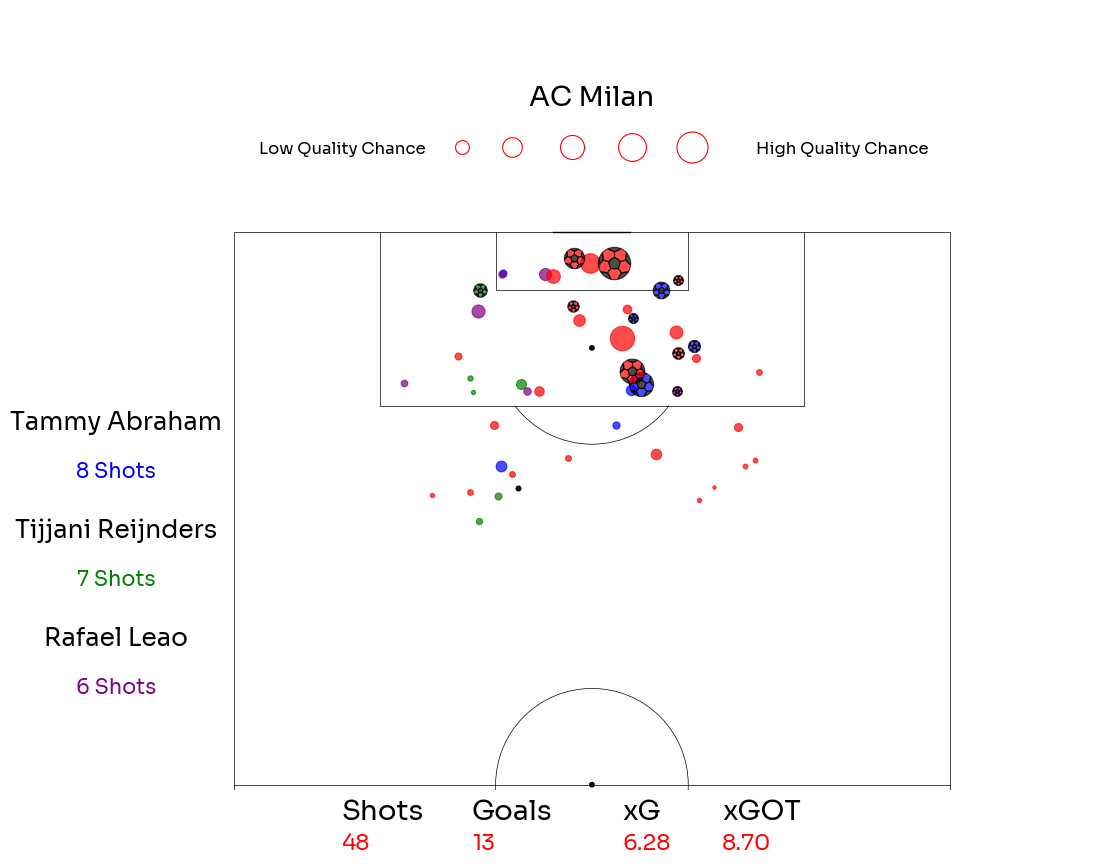

In [306]:
import matplotlib.cm as cm
#kane = final_shots_df[final_shots_df['playerName'] == 'Harry Kane']
#milan_shots_df_copy = milan_shots_df[milan_shots_df['teamId'] == 8564]
plot_shotmap_understat_player(milan_shots_df_copy,'AC Milan','red')

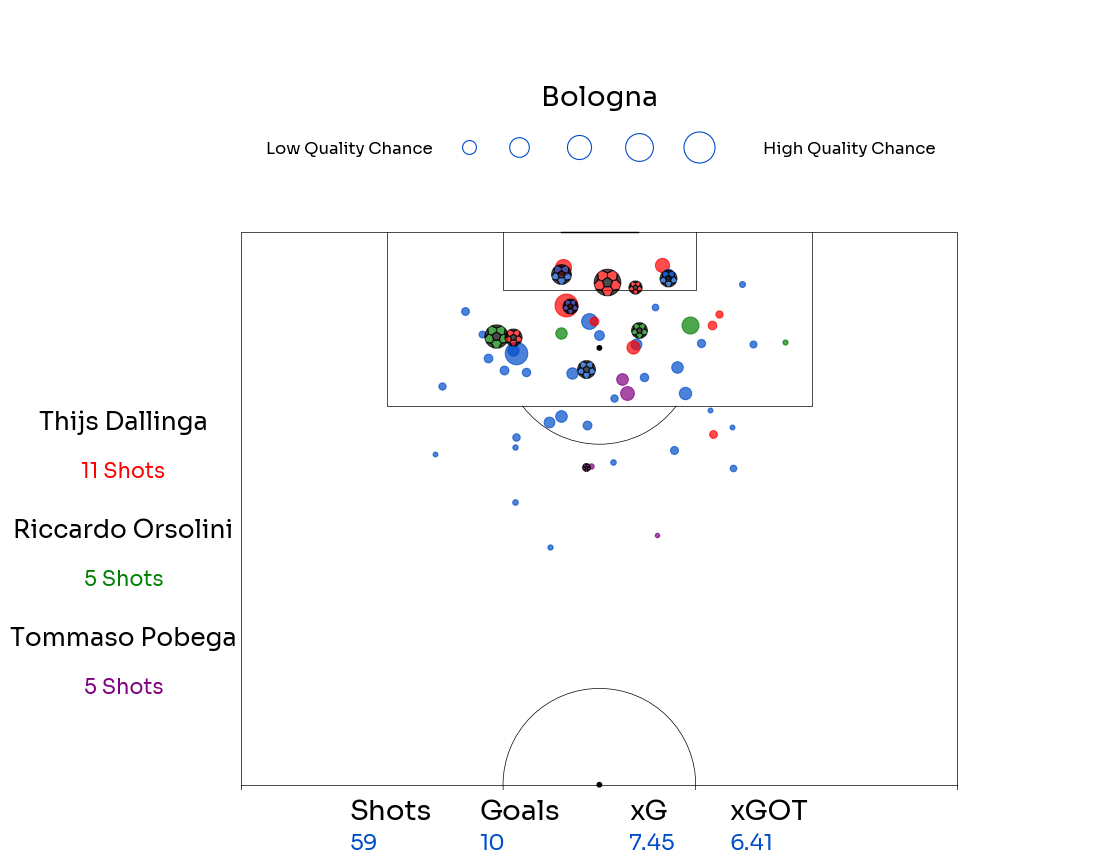

In [303]:
#kane = final_shots_df[final_shots_df['playerName'] == 'Harry Kane']
#bologna_shots_df_copy = bologna_shots_df[bologna_shots_df['teamId'] == 9857]
plot_shotmap_understat_player(bologna_shots_df_copy,'Bologna','#004eca')

In [116]:
def zone(row):
  if row['goalCrossedY'] > 30.3 and row['goalCrossedY'] < 37.7 and row['goalCrossedZ'] < 2.5:
    if row['goalCrossedY'] < 30.3+8/3:
      zone_h = 'left'
    elif row['goalCrossedY'] >= 30.3+8/3 and row['goalCrossedY'] < 30.3+2*8/3:
      zone_h = 'center'
    else:
      zone_h = 'right'

    if row['goalCrossedZ'] < 2.5/2:
      zone_v = 'bottom'
    else:
      zone_v = 'top'
    zone = zone_v+' '+zone_h
    return zone
  else:
    return np.nan

kane['zone'] = kane.apply(lambda x:zone(x), axis=1)

In [119]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mplsoccer import add_image
from matplotlib.patches import Rectangle

def plot_shot_map(ax, shots_df, team,teamcolor, pname, against, background,flag=True):
    ax.set_facecolor(background)
    ax.plot([29, 39], [0, 0], color='#c7d5cc', linewidth=1.5)
    ax.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
    ax.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
    ax.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)
    
    ax.add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='white', hatch='+', alpha=0.1))
    ax.axis('off')
    
    total_shot = len(shots_df)
    percentage = {}
    for zone in shots_df['zone'].unique():
      percentage[zone] = round(len(shots_df.loc[shots_df['zone']==zone])/total_shot, 2)
    
    #zone
    plt.gca().add_patch(Rectangle((30.3, 0), 7.4/3, 2.5/2, color='red', alpha=percentage['bottom left'])) # bottom left
    plt.gca().add_patch(Rectangle((30.3, 2.5/2), 7.4/3, 2.5/2, color='red', alpha=percentage['top left'])) # top left
    plt.gca().add_patch(Rectangle((30.3+7.4/3, 0), 7.4/3, 2.5/2, color='red', alpha=percentage['bottom center'])) # bottom center
    plt.gca().add_patch(Rectangle((30.3+7.4/3, 2.5/2), 7.4/3, 2.5/2, color='red', alpha=percentage['top center'])) # top center
    plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 0), 7.4/3, 2.5/2, color='red', alpha=percentage['bottom right'])) # bottom right
    plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 2.5/2), 7.4/3, 2.5/2, color='red', alpha=percentage['top right'])) # top right
    
    
    #Tidy Axes
    plt.axis('off')
    
    plt.title("On Goal Shot Distribution",color='white', fontsize=30,ha='center')
    
    plt.text(x=30.3+7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom left'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    plt.text(x=30.3+7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top left'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    plt.text(x=30.3+3*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom center'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    plt.text(x=30.3+3*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top center'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    plt.text(x=30.3+5*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom right'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    plt.text(x=30.3+5*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top right'])), color='white', fontsize=16, weight="bold", ha='center', va='center')
    
    
    plt.ylim(ymin=0, ymax=3)
    plt.xlim(xmin=29.5, xmax=38.5)
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/{pname}2.png',dpi=500,bbox_inches = 'tight',facecolor=background)

        

    return

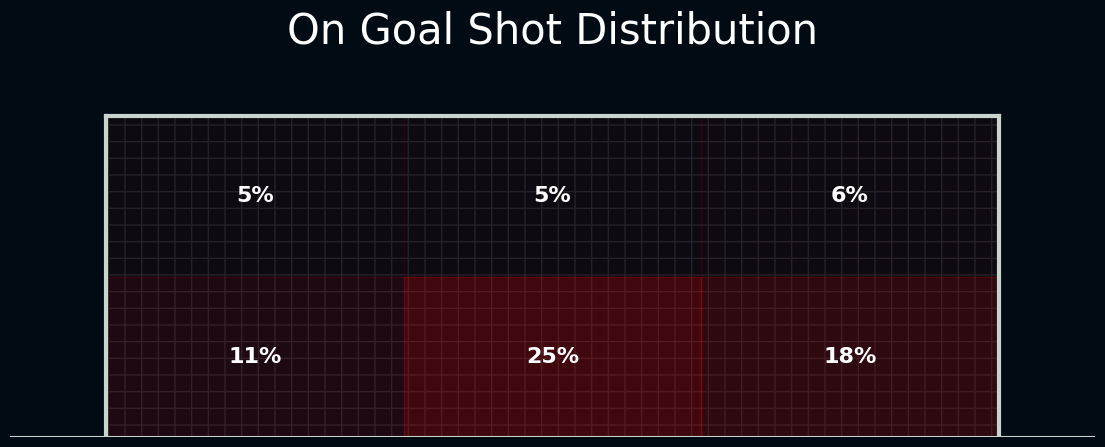

In [120]:
fig, axes = plt.subplots(figsize=(14, 5), facecolor=background)

# Example usage: plot shot maps on both subplots
plot_shot_map(axes, kane, "Bayern",'red', "Harry Kane", "Real Madrid",background)

## Average Positions

In [99]:
def scrape_sofascore_average_positions(matchId):
    response1 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/average-positions')
    #response2 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/lineups')
    data1 = response1.json()
    #data2 = response2.json()
    return data1

#mi = 12514006
#data1,data2 = scrape_sofascore_average_positions(mi)

In [100]:
match_ids = [12512901,12513987,12513997,12514006,12514014,12514029,12514034,12514044,12514056,12514067]
avg_pos = []
for mi in match_ids:
    data1 = scrape_sofascore_average_positions(mi)
    avg_pos.append(data1)

In [106]:
home_positions = []
away_positions = []

for match_data in avg_pos:
    if match_data:  # Check if match_data is not None
        home_positions.append(pd.json_normalize(match_data['home']))
        away_positions.append(pd.json_normalize(match_data['away']))

# Concatenate all home and away data into separate DataFrames
df_home_pos = pd.concat(home_positions, ignore_index=True)
df_away_pos = pd.concat(away_positions, ignore_index=True)

In [141]:
player_names = ['Viktor Gyökeres','Pedro Gonçalves','Francisco Trincão','Ousmane Diomande', 
                'Gonçalo Inácio','Geovany Quenda', 'Geny Catamo', 'Morten Hjulmand',
               'Eduardo Quaresma','Hidemasa Morita','Vladan Kovačević']

df_home_avg_pos = df_home_pos[df_home_pos['player.name'].isin(player_names)]
df_away_avg_pos = df_away_pos[df_away_pos['player.name'].isin(player_names)]

In [424]:
df_avg_positions.at[2, 'averageY'] = 78

In [419]:
# Concatenate home and away DataFrames
df_combined = pd.concat([df_home_avg_pos, df_away_avg_pos], ignore_index=True)

df_avg_positions = (
    df_combined
    .groupby('player.name')
    .agg({
        'averageX': 'mean',
        'averageY': 'mean',
        'player.jerseyNumber': 'first',
        'player.position': 'first'
    })
    .reset_index()
)


In [444]:
def plot_avg_positions(df,teamcolor,ax):
    pitch = VerticalPitch(pitch_type='opta',positional=True, shade_middle=True, positional_color='green',
                          shade_color='grey',line_color='green',pitch_color=background,axis=False,linewidth=0.5)
    pitch.draw(ax=ax)

    for index,row in df.iterrows():
        pitch.scatter(row['averageX'],row['averageY'],color='white', s=2000, edgecolor=teamcolor, linewidth=2, alpha=0.9,marker='o',ax=ax)
        pitch.annotate(row['player.jerseyNumber'],xy = (row['averageX'],row['averageY']),color='black',ha='center', va='center',fontsize=20,fontproperties=font_prop,ax=ax)

    ax.text(27,110,f"Average Player Positions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
    ax.text(68,105,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)

    img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Sporting.png')
    ax_image = add_image(
    img_team, fig, left=0.63, bottom=0.87, width=0.08, height=0.08,aspect='equal'
    )

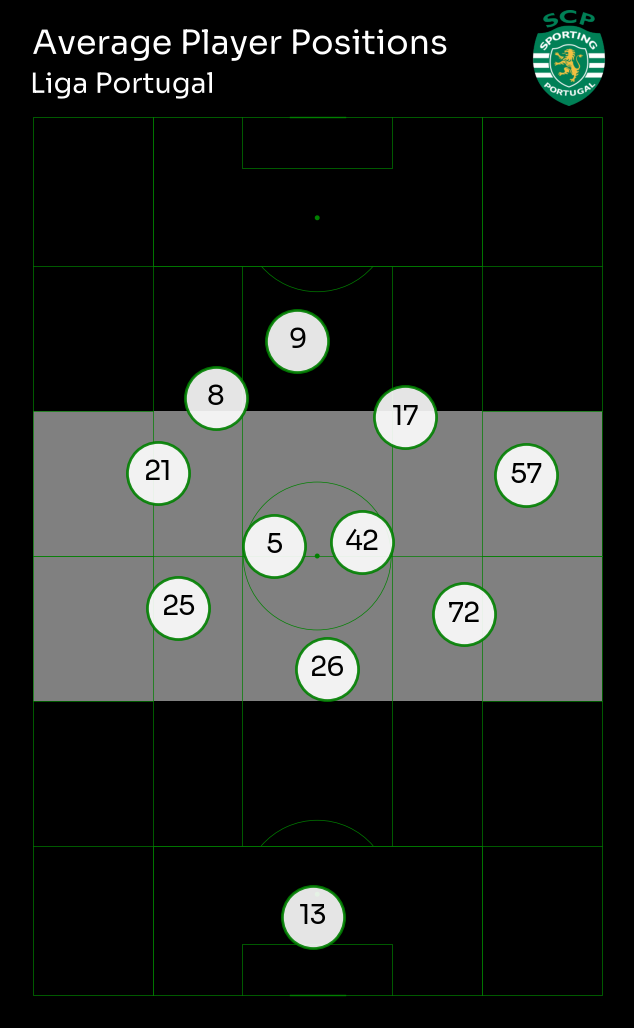

In [446]:
fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
plot_avg_positions(df_avg_positions,'green',ax)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/1.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Chance Creation Zones

In [398]:
df.columns

Index(['Unnamed: 0.1', 'index', 'eventId', 'minute', 'second', 'teamId', 'x',
       'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isOwnGoal_x', 'cumulative_mins', 'Unnamed: 0_x', 'isGoal_y',
       'cardType_y', 'isOwnGoal_y', 'Unnamed: 0_y', 'x1_bin_xT', 'y1_bin_xT',
       'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT',
       'xT', 'teamName', 'oppositionTeamName', 'Unnamed: 0', 'shirtNo', 'name',
       'position', 'isFirstEleven', 'prog_pass', 'prog_carry',
       'pass_or_carry_angle', 'shortName'],
      dtype='object')

In [208]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
# setting the custom colormap


def Chance_creating_zone(df,ax,team,col):
    pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [background, col], N=15)

    path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]
    team_df = df[df['teamName'] == team]
    ccp = team_df[(team_df['bigChanceCreated'] == True) & (team_df['outcomeType'] == 'Successful')]
    pitch = VerticalPitch(pitch_type='uefa',half=True, line_color='white', corner_arcs=True, line_zorder=2, pitch_color=background, linewidth=1)
    pitch.draw(ax=ax)
    #ax.set_xlim(-0.5, 105.5)

    cc = 0
    #pearl_earring_cmap = cm
    bin_statistic = pitch.bin_statistic(ccp.x, ccp.y, bins=(6,5), statistic='count', normalize=False)
    pitch.heatmap(bin_statistic, ax=ax, cmap=pearl_earring_cmap,alpha=0.8, edgecolors='#f8f8f8')

    labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax, ha='center', va='center', str_format='{:.0f}', path_effects=path_eff)
    ax.text(12,110,f"Big Chances Created - Zone Analysis", color='white', fontsize=25, ha='right', va='top', fontweight='bold', path_effects=path_eff,fontproperties=font_prop)

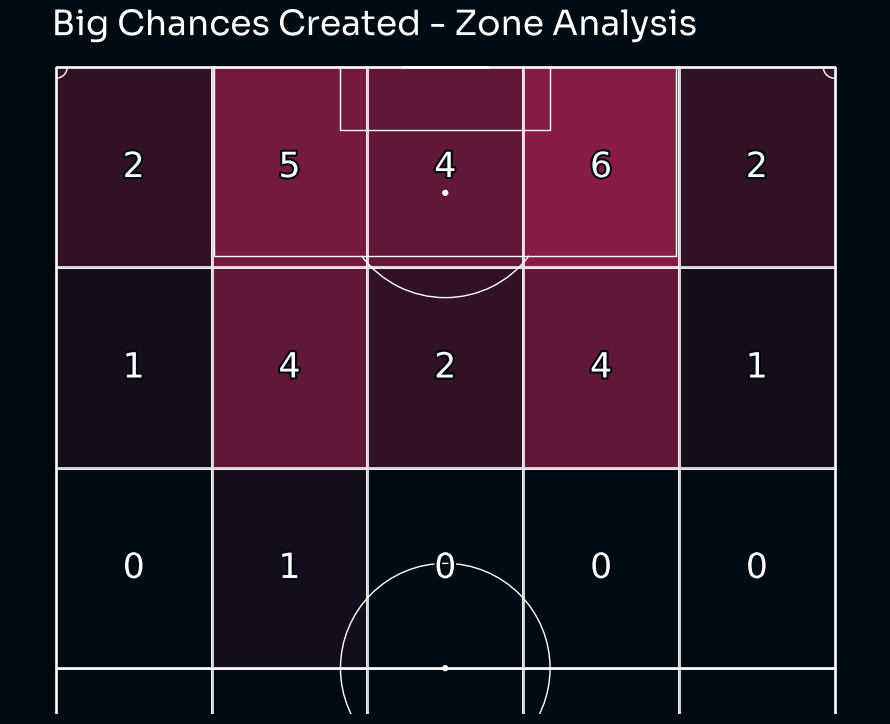

In [209]:
fig,ax=plt.subplots(figsize=(16,9), facecolor=background)
chance_creating_stats_home = Chance_creating_zone(df,ax,'Barcelona', '#ab2151')
#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/3.png',dpi=500,bbox_inches = 'tight',facecolor=background)


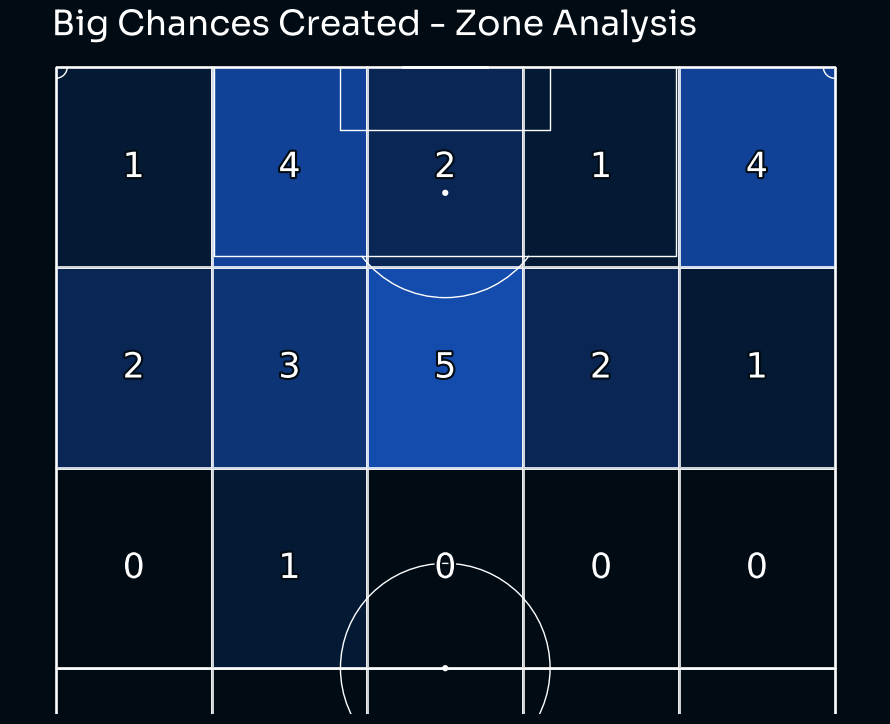

In [210]:
fig,ax=plt.subplots(figsize=(16,9), facecolor=background)
chance_creating_stats_home = Chance_creating_zone(df,ax,'Inter', '#1A5DD4')
#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/3.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Comparison Pizza Plots

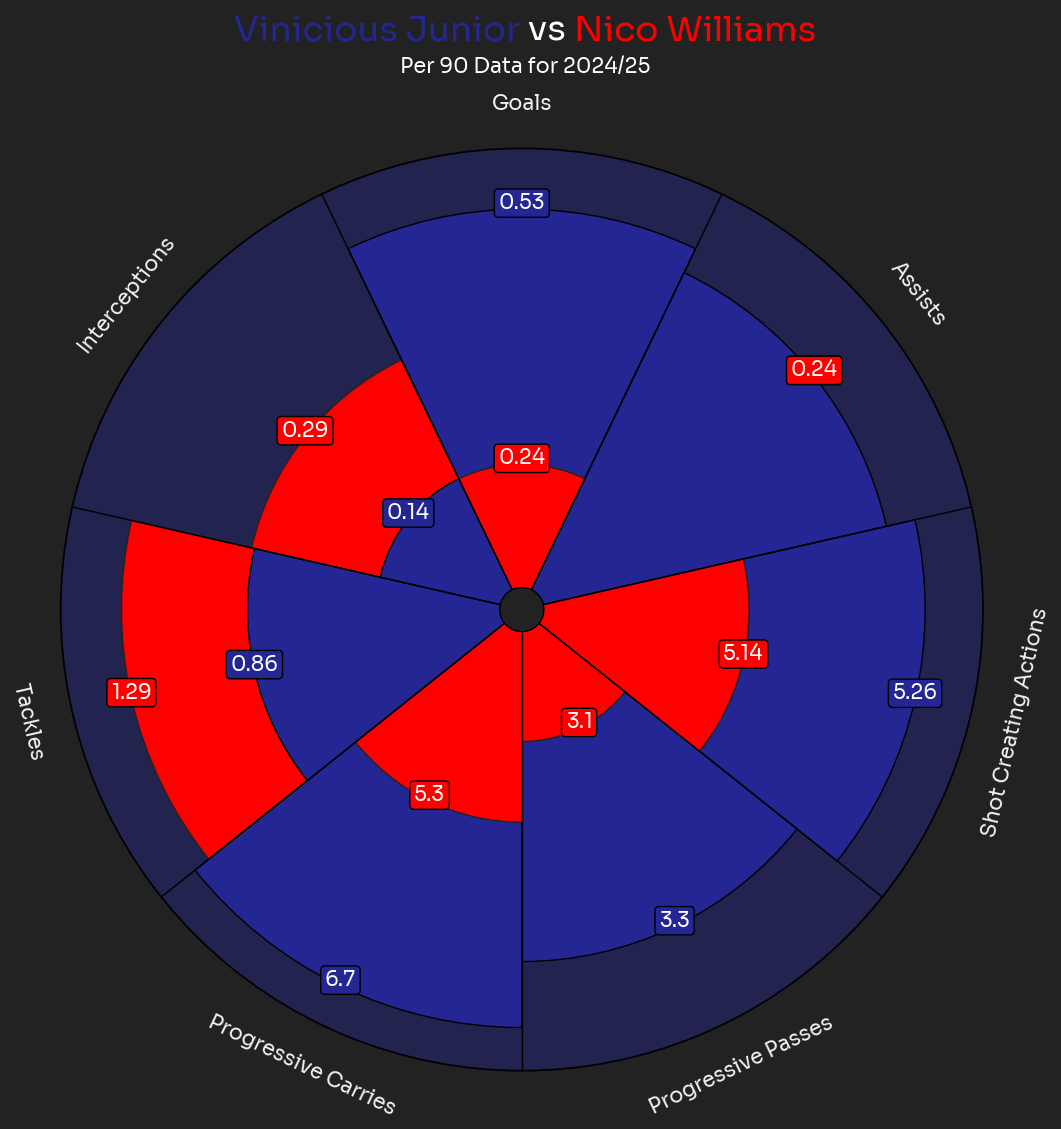

In [7]:
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

params = [
    "Goals","Assists", "Shot Creating Actions",
     "Progressive Passes", "Progressive Carries",
    "Tackles", "Interceptions"
]

vini = [0.53, 0.24, 5.26, 3.3, 6.7, 0.86, 0.14]
nico = [0.24, 0.24, 5.14, 3.1, 5.3, 1.29, 0.29]
#zirkzee =  [0.26, 0.32, 2.8, 3.06, 78.1, 2.95, 1.74, 4.65, 0.91, 0.08]

# minimum range value and maximum range value for parameters
min_range = [0.1, 0 , 5 , 3 , 4 , 0, 0]
max_range = [0.6, 0.3, 5.3, 3.4, 7, 1.5, 0.5]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    vini,                     # list of values
    compare_values=nico,    # passing comparison values
    figsize=(12, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#242694", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="red", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=15, zorder=5,
        fontproperties=font_prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#242694",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

# add title
fig_text(
    0.515, 0.99, "<Vinicious Junior> vs <Nico Williams>",
    size=25, fig=fig,
    highlight_textprops=[{"color": '#242694'}, {"color": 'red'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Data for 2024/25",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/ViniVNico.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Radar Plots

In [516]:
from mplsoccer import Radar, FontManager, grid

# parameter names of the statistics we want to show
params = ['Goals','npxG','Assists','Shot Creating Actions',
          'Passes Received','Pass Completion %','Progressive Passes','Progressive Carries',
          'Tackles','Interceptions','Clearances','Errors']


p1_values =    [0.14, 0.16, 0.14, 4.06, 50.7, 87.8, 8.26, 1.16, 2.17, 0.58, 1.45, 0.14]
p2_values =  [0.16, 0.15, 0.0, 4.92, 53.8, 79.5, 5.74, 0.49, 3.93, 0.82, 3.77, 0.49]
p3_values =    [0.0, 0.0, 0.0, 2.38, 35.7, 88, 2.38, 0.95, 4.29, 0.48, 1.96, 0.48]


# The lower and upper boundaries for the statistics
low =  [0.0, 0.0, 0.0, 1, 30,  70, 2, 0.0, 1, 0, 0, 0]
high = [0.3, 0.3, 0.2, 6, 60, 100, 10, 2, 6, 2, 5, 1]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Errors']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

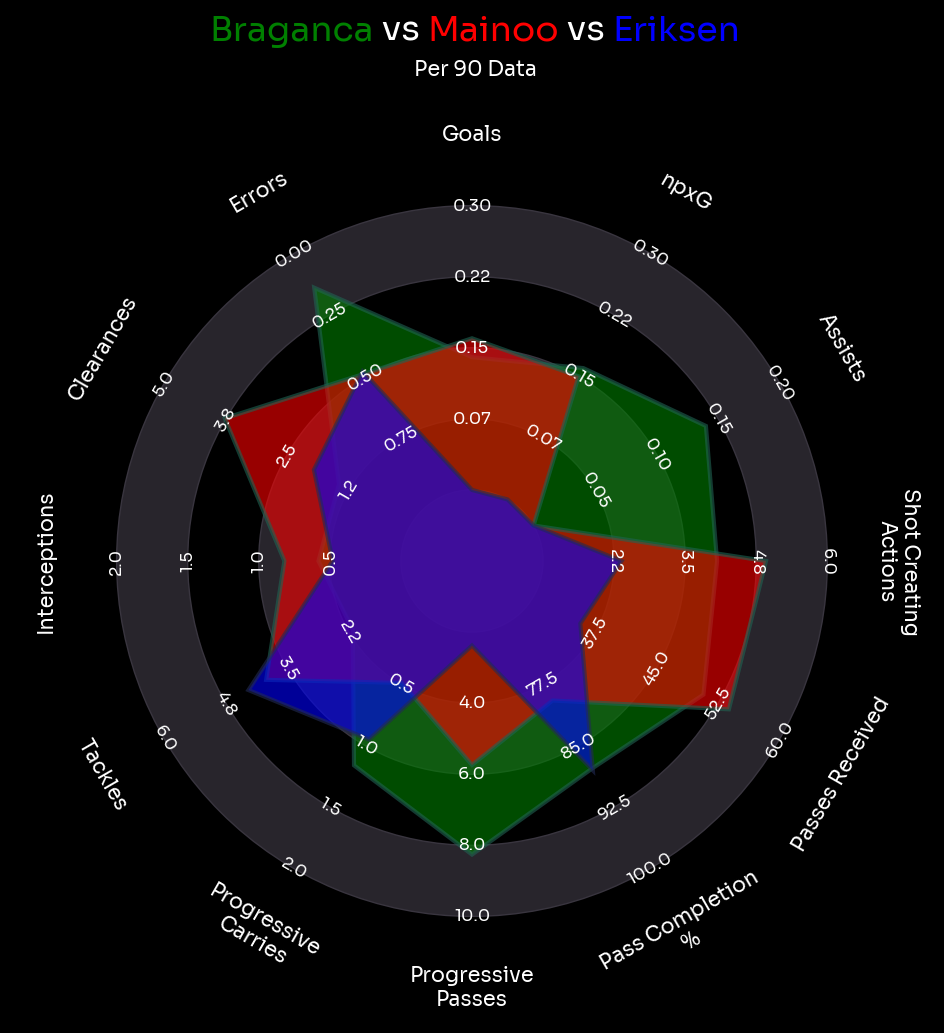

In [519]:
fig, ax = radar.setup_axis(facecolor=background)
fig.set_facecolor(background)


p1 = 'Braganca'
p2 = 'Mainoo'
p3 = 'Eriksen'
# add title
fig_text(
    0.515, 0.95, f"<{p1}> vs <{p2}> vs <{p3}>",
    size=25, fig=fig,
    highlight_textprops=[{"color": 'green'}, {"color": 'red'},{"color": 'blue'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.9,
    "Per 90 Data",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)
rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f')

radar1, vertices1 = radar.draw_radar_solid(morita_values, ax=ax,
                                           kwargs={'facecolor': 'green',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(casemiro_values, ax=ax,
                                           kwargs={'facecolor': 'red',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(ugarte_values, ax=ax,
                                           kwargs={'facecolor': 'blue',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

#ax.scatter(vertices1[:, 0], vertices1[:, 1],
#           c='white', edgecolors='green', marker='o', s=100, zorder=2)
#ax.scatter(vertices2[:, 0], vertices2[:, 1],
#           c='white', edgecolors='red', marker='o', s=100, zorder=2)
#ax.scatter(vertices3[:, 0], vertices3[:, 1],
#           c='white', edgecolors='blue', marker='o', s=100, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=font_prop,color='white')
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=font_prop,color='white')

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/8.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## PassMaps

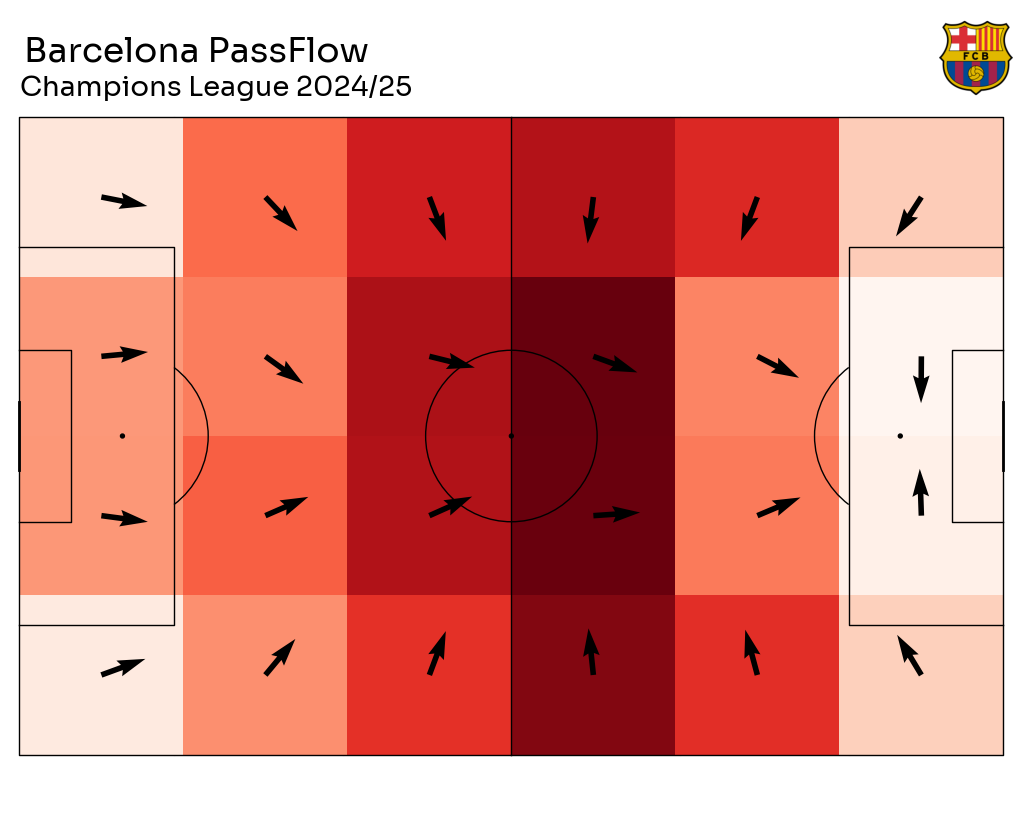

In [216]:
bayern_df = df[df['teamName'] == 'Barcelona']
mask_passes = bayern_df.type == 'Pass'
passes_df = bayern_df.loc[mask_passes]
pitch = Pitch(pitch_type='uefa',positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', pad_bottom=1, pad_top=1,pad_left=1, pad_right=1,
              line_zorder=2, line_color='black', pitch_color='white',linewidth=1)
bins = (6, 4)
fig, axs = pitch.grid(figheight=8,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('white')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(passes_df.x, passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Reds')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(passes_df.x, passes_df.y, passes_df.endX, passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

axs['title'].text(0.18, 0.7, f'Barcelona PassFlow',
                  fontsize=25, fontproperties=font_prop,color='black', va='center', ha='center')
axs['title'].text(0.2, 0.25, f'Champions League 2024/25',
                  fontsize=20, fontproperties=font_prop,color='black', va='center', ha='center')


img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Barcelona.png')
ax_image = add_image(
    img_team, fig, left=0.88, bottom=0.9, width=0.12, height=0.12,aspect='equal'
    )

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/BarcaPassFlow.png',dpi=500,bbox_inches = 'tight',facecolor='white')

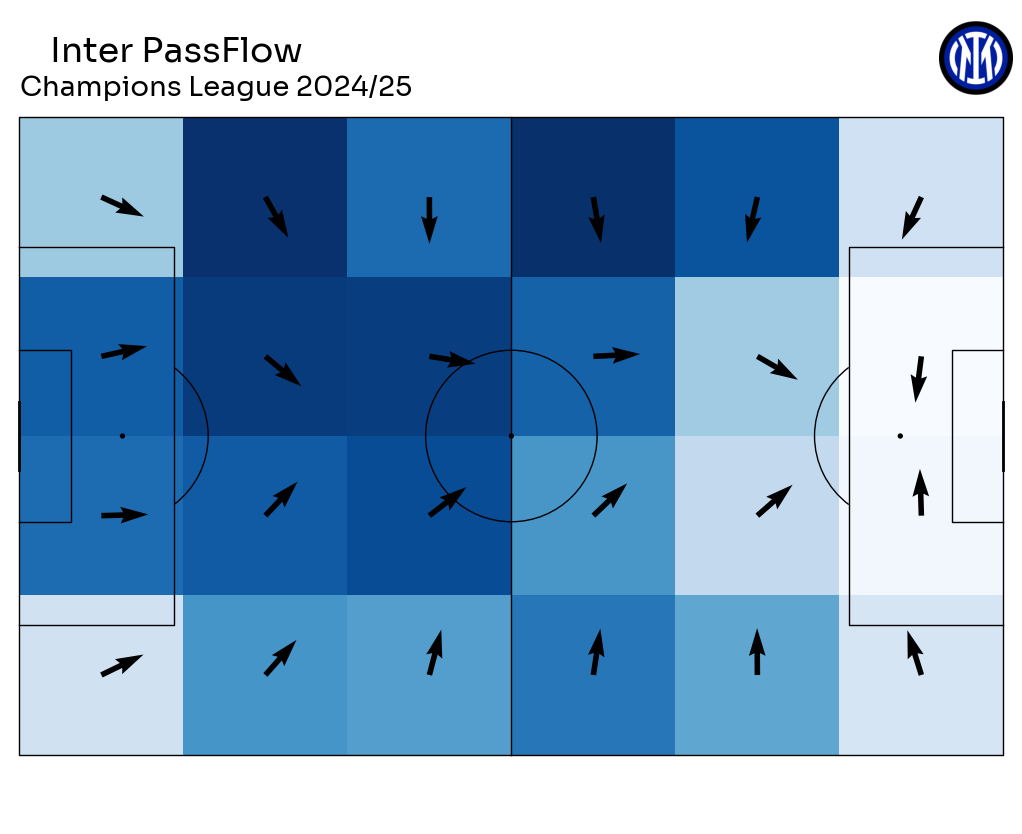

In [217]:
bayern_df = df[df['teamName'] == 'Inter']
mask_passes = bayern_df.type == 'Pass'
passes_df = bayern_df.loc[mask_passes]
pitch = Pitch(pitch_type='uefa',positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', pad_bottom=1, pad_top=1,pad_left=1, pad_right=1,
              line_zorder=2, line_color='black', pitch_color='white',linewidth=1)
bins = (6, 4)
fig, axs = pitch.grid(figheight=8,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('white')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(passes_df.x, passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(passes_df.x, passes_df.y, passes_df.endX, passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

axs['title'].text(0.16, 0.7, f'Inter PassFlow',
                  fontsize=25, fontproperties=font_prop,color='black', va='center', ha='center')
axs['title'].text(0.2, 0.25, f'Champions League 2024/25',
                  fontsize=20, fontproperties=font_prop,color='black', va='center', ha='center')


img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Inter.png')
ax_image = add_image(
    img_team, fig, left=0.88, bottom=0.9, width=0.12, height=0.12,aspect='equal'
    )

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/InterPassFlow.png',dpi=500,bbox_inches = 'tight',facecolor='white')

## Defensive Actions

In [183]:
def get_defensive_action_df(df):
    # filter only defensive actions
    defensive_actions_ids = df.index[(df['type'] == 'Aerial') & (df['qualifiers'].str.contains('Defensive')) |
                                     (df['type'] == 'BallRecovery') |
                                     (df['type'] == 'BlockedPass') |
                                     (df['type'] == 'Challenge') |
                                     (df['type'] == 'Clearance') |
                                     (df['type'] == 'Error') |
                                     (df['type'] == 'Foul') |
                                     (df['type'] == 'Interception') |
                                     (df['type'] == 'Tackle')]
    df_defensive_actions = df.loc[defensive_actions_ids, ["index", "x", "y", "teamName","playerName", "playerId", "type", "outcomeType"]]

    return df_defensive_actions

defensive_actions_df = get_defensive_action_df(df)

In [184]:
defensive_actions_df = defensive_actions_df.drop_duplicates()

In [185]:
defensive_actions_df = defensive_actions_df[(defensive_actions_df['outcomeType'] == 'Successful') & (defensive_actions_df['teamName'] == 'Inter')]

In [186]:
defensive_actions_df['type'].value_counts()

type
BallRecovery    482
Clearance       347
Foul            157
Interception    115
Aerial          108
Tackle          107
BlockedPass      90
Error            12
Name: count, dtype: int64

Text(58, 75, ' Defensive Actions')

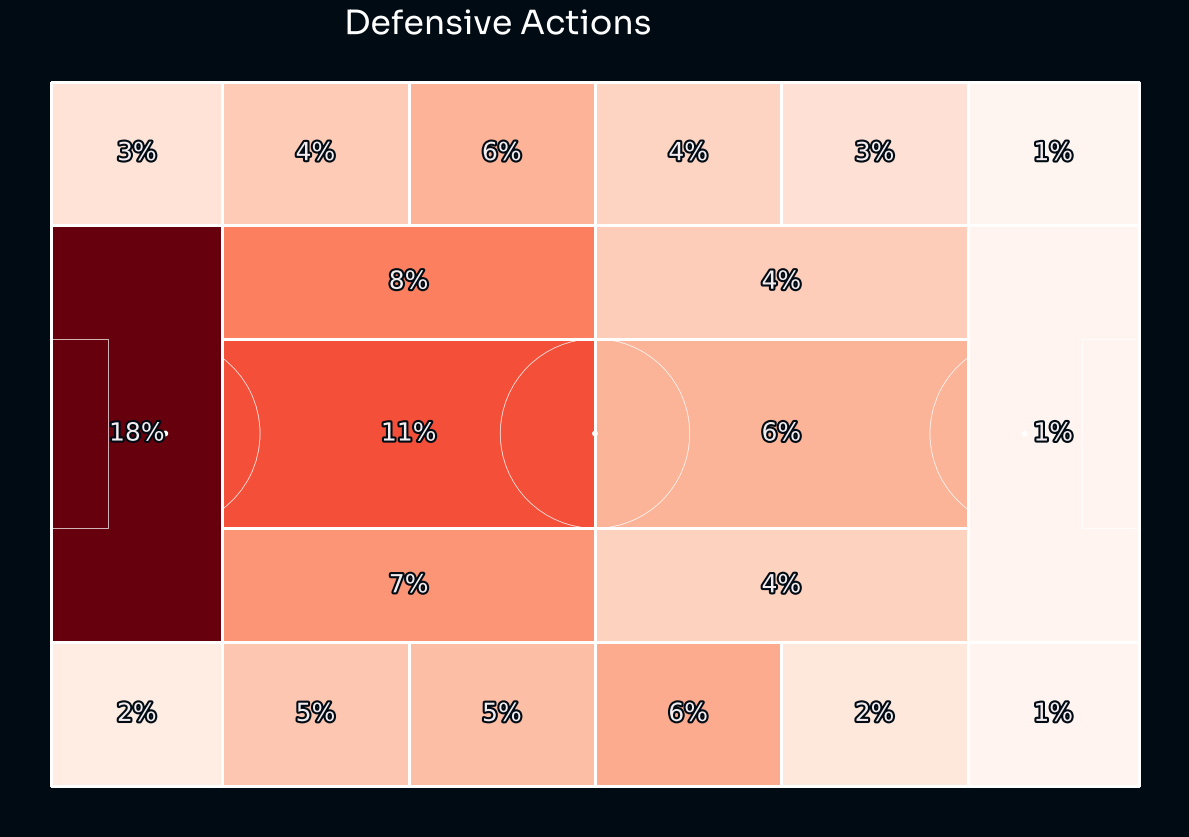

In [180]:
# setup pitch
pitch = Pitch(pitch_type='uefa', line_zorder=2,
                      pitch_color=background, line_color='white',linewidth=0.5)
# draw
fig, ax = pitch.draw(figsize=(12, 12))
fig.set_facecolor(background)
bin_statistic = pitch.bin_statistic_positional(defensive_actions_df.x, defensive_actions_df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Reds', edgecolors='white')
path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]
#pitch.scatter(defensive_actions_df.x, defensive_actions_df.y, c='black',marker='*', s=2,alpha=0.5, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

ax.text(58,75,f" Defensive Actions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
#ax.text(49,110,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
#            path_effects=path_eff,fontproperties=font_prop)
#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/VVD.png',dpi=500,bbox_inches = 'tight',facecolor=background)


Text(58, 75, ' Defensive Actions')

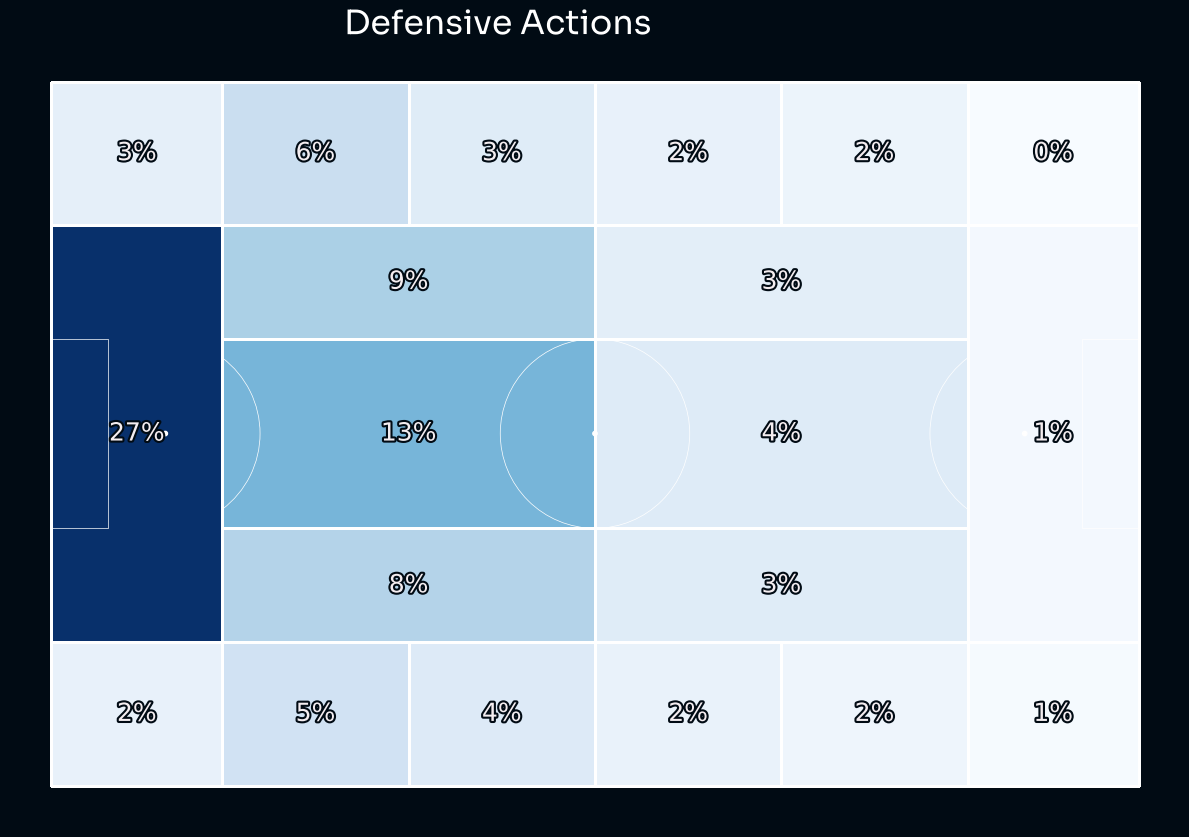

In [187]:
# setup pitch
pitch = Pitch(pitch_type='uefa', line_zorder=2,
                      pitch_color=background, line_color='white',linewidth=0.5)
# draw
fig, ax = pitch.draw(figsize=(12, 12))
fig.set_facecolor(background)
bin_statistic = pitch.bin_statistic_positional(defensive_actions_df.x, defensive_actions_df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Blues', edgecolors='white')
path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]
#pitch.scatter(defensive_actions_df.x, defensive_actions_df.y, c='black',marker='*', s=2,alpha=0.5, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

ax.text(58,75,f" Defensive Actions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
#ax.text(49,110,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
#            path_effects=path_eff,fontproperties=font_prop)
#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/VVD.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## GK Analysis

In [472]:
df['name'].unique()

array([nan, 'Viktor Gyokeres', 'Hidemasa Morita', 'Nuno Santos',
       'Geovany Quenda', 'Eduardo Quaresma', 'Matheus Reis', 'Pote',
       'Ousmane Diomande', 'Zeno Debast', 'Geny Catamo', 'Goncalo Inacio',
       'Morten Hjulmand', 'Trincao', 'Vladan Kovacevic',
       'Daniel Braganca', 'Franco Israel', 'Maximiliano Araujo',
       'Conrad Harder', 'Mateus Fernandes', 'Ivan Fresneda',
       'Jeremiah St. Juste', 'Marcus Edwards', 'Ricardo Esgaio',
       'Dario Essugo', 'Rodrigo Ribeiro'], dtype=object)

## Set Piece Analysis

In [327]:
df_team['type'].unique()

array(['Start', 'Pass', 'KeeperPickup', 'Aerial', 'Clearance',
       'BallTouch', 'Carry', 'Foul', 'BallRecovery', 'CornerAwarded',
       'OffsideProvoked', 'KeeperSweeper', 'TakeOn', 'Challenge',
       'Tackle', 'Dispossessed', 'Interception', 'MissedShots',
       'SavedShot', 'OffsidePass', 'BlockedPass', 'Save', 'Claim', 'Goal',
       'GoodSkill', 'ShieldBallOpp', 'Error', 'Card', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'End', 'OffsideGiven',
       'Punch', 'CrossNotClaimed', 'ShotOnPost', 'PenaltyFaced',
       'Smother', 'FormationSet'], dtype=object)

In [469]:
df_team.reset_index(inplace=True)

In [471]:
def get_next_events_by_index(df, current_index, num_events=3, target_types=None):
    """
    Get the next consecutive rows based on DataFrame indices and filter by event type.
    Only process if the current event is of type 'Pass'.
    """
    # Check if the current event is a 'Pass'
    if df.loc[current_index, 'type'] != 'Pass':
        return []  # Return an empty list if the type is not 'Pass'

    # Get the valid range of indices for the next events
    max_index = len(df) - 1
    next_indices = [i for i in range(current_index + 1, current_index + 1 + num_events) if i <= max_index]
    
    # Fetch the rows using the valid indices
    next_events = df.iloc[next_indices].reset_index(drop=True)
    
    # Filter for relevant types, if provided
    if target_types:
        next_events = next_events[next_events['type'].isin(target_types)]
    
    return next_events.to_dict('records')

# Define the target types
target_types = ['SavedShot', 'MissedShots', 'ShotOnPost', 'Goal']

# Add next events for corners_1 using indices
df_team['next_events'] = df_team.index.map(
    lambda idx: get_next_events_by_index(df_team, idx, num_events=3, target_types=target_types)
)

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\226485883.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['next_events'] = df_team.index.map(


In [510]:
mask_corners_1 = (
    (df_team['type'] == 'Pass')  &
    ((df_team['x'].round(3) == 104.475) & (df_team['y'].round(3) == 67.660))
)

mask_corners_2 = (
    (df_team['type'] == 'Pass')  &
    ((df_team['x'].round(3) == 104.475) & (df_team['y'].round(3) == 0.340))
)

# Filter the DataFrame to get corner kick events
corners_1 = df_team.loc[mask_corners_1]
corners_2 = df_team.loc[mask_corners_2]

In [512]:
corners_1['next_events_type'] = corners_1['next_events'].apply(
    lambda next_events: [event['type'] for event in next_events] if next_events else None
)

corners_2['next_events_type'] = corners_2['next_events'].apply(
    lambda next_events: [event['type'] for event in next_events] if next_events else None
)


C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3133059281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['next_events_type'] = corners_1['next_events'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3133059281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['next_events_type'] = corners_2['next_events'].apply(


In [612]:
corners_1['shot_name'] = corners_1['next_events'].apply(
    lambda next_events: [event['name'] for event in next_events] if next_events else None
)

corners_2['shot_name'] = corners_2['next_events'].apply(
    lambda next_events: [event['name'] for event in next_events] if next_events else None
)

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2305591163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['shot_name'] = corners_1['next_events'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2305591163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['shot_name'] = corners_2['next_events'].apply(


In [599]:
# Function to extract the x and y coordinates of the last shot from next_events
def extract_last_shot_coordinates(next_events):
    if next_events:
        # Filter out events that are shots (Shot types: 'SavedShot', 'MissedShot', 'ShotOnPost', 'Goal')
        shot_events = [event for event in next_events if event['type'] in ['SavedShot', 'MissedShots', 'ShotOnPost', 'Goal']]
        if shot_events:
            # Get the coordinates of the last shot event
            last_shot = shot_events[-1]
            return last_shot['x'], last_shot['y']
    return None, None  # Return None if no shots found

# Apply the function to extract coordinates for corners_1
corners_1['next_shot_x'], corners_1['next_shot_y'] = zip(*corners_1['next_events'].apply(extract_last_shot_coordinates))

# Apply the function to extract coordinates for corners_2
corners_2['next_shot_x'], corners_2['next_shot_y'] = zip(*corners_2['next_events'].apply(extract_last_shot_coordinates))

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2202748809.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['next_shot_x'], corners_1['next_shot_y'] = zip(*corners_1['next_events'].apply(extract_last_shot_coordinates))
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2202748809.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['next_shot_x'], corners_2['next_shot_y'] = zip(*corners_2['next_events'].apply(extract_last_shot_coordinates))


In [611]:
# Calculate the number of shots (next_events_type is not None)
corners_1['total_shots'] = corners_1['next_events_type'].apply(
    lambda x: 1 if x is not None else 0
)

# Calculate the number of goals (next_events_type contains 'Goal')
corners_1['goals'] = corners_1['next_events_type'].apply(
    lambda x: 1 if 'Goal' in (x if isinstance(x, list) else [x]) else 0
)

# Calculate the number of goals (next_events_type contains 'Goal')
corners_1['shots_ot'] = corners_1['next_events_type'].apply(
    lambda x: 1 if 'SavedShot' in (x if isinstance(x, list) else [x]) else 0
)

# Repeat for corners_2
corners_2['total_shots'] = corners_2['next_events_type'].apply(
    lambda x: 1 if x is not None else 0
)

corners_2['goals'] = corners_2['next_events_type'].apply(
    lambda x: 1 if 'Goal' in (x if isinstance(x, list) else [x]) else 0
)

corners_2['shots_ot'] = corners_2['next_events_type'].apply(
    lambda x: 1 if 'SavedShot' in (x if isinstance(x, list) else [x]) else 0
)

# Now you can calculate the total number of shots and goals by corner type
shots_by_corner_type_1 = corners_1.groupby('type')['total_shots'].sum()
goals_by_corner_type_1 = corners_1.groupby('type')['goals'].sum()
shots_ot_by_corner_type_1 = corners_1.groupby('type')['shots_ot'].sum()

shots_by_corner_type_2 = corners_2.groupby('type')['total_shots'].sum()
goals_by_corner_type_2 = corners_2.groupby('type')['goals'].sum()
shots_ot_by_corner_type_2 = corners_2.groupby('type')['shots_ot'].sum()

# Combine them to get a complete picture
corner_summary_1 = pd.DataFrame({
    'total_shots': shots_by_corner_type_1,
    'goals': goals_by_corner_type_1,
    'shots_ot': shots_ot_by_corner_type_1
})

corner_summary_2 = pd.DataFrame({
    'total_shots': shots_by_corner_type_2,
    'goals': goals_by_corner_type_2,
    'shots_ot': shots_ot_by_corner_type_2
})

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['total_shots'] = corners_1['next_events_type'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['goals'] = corners_1['next_events_type'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [678]:
df_team['type'].unique()

array(['FormationSet', 'Start', 'Pass', 'Aerial', 'BallTouch', 'TakeOn',
       'KeeperPickup', 'Tackle', 'BallRecovery', 'Foul', 'CornerAwarded',
       'Clearance', 'Save', 'Dispossessed', 'Interception', 'BlockedPass',
       'GoodSkill', 'SavedShot', 'MissedShots', 'Goal', 'Challenge',
       'End', 'Card', 'Error', 'SubstitutionOff', 'SubstitutionOn',
       'OffsideProvoked', 'FormationChange', 'Claim', 'OffsidePass',
       'OffsideGiven', 'Punch', 'Smother', 'KeeperSweeper',
       'ShieldBallOpp', 'ShotOnPost', 'PenaltyFaced', 'CrossNotClaimed'],
      dtype=object)

In [624]:
print(f"Most Corners Taken By From Left {corners_1['name'].value_counts().idxmax()} {corners_1['name'].value_counts().max()}")
print(f"Most Corners Taken By From Right {corners_2['name'].value_counts().idxmax()} {corners_2['name'].value_counts().max()}")

print(f"Most Shots Taken By From Left {corners_1['shot_name'].value_counts().idxmax()} {corners_1['shot_name'].value_counts().max()}")
print(f"Most Shots Taken By From Right {corners_2['shot_name'].value_counts().idxmax()} {corners_2['shot_name'].value_counts().max()}")

Most Corners Taken By From Left Declan Rice 34
Most Corners Taken By From Right Bukayo Saka 39
Most Shots Taken By From Left ['Gabriel Magalhaes'] 2
Most Shots Taken By From Right ['Gabriel Magalhaes'] 6


C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pitch.annotate(corner_summary_1['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pitch.annotate(corner_summary_1['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:55: Future

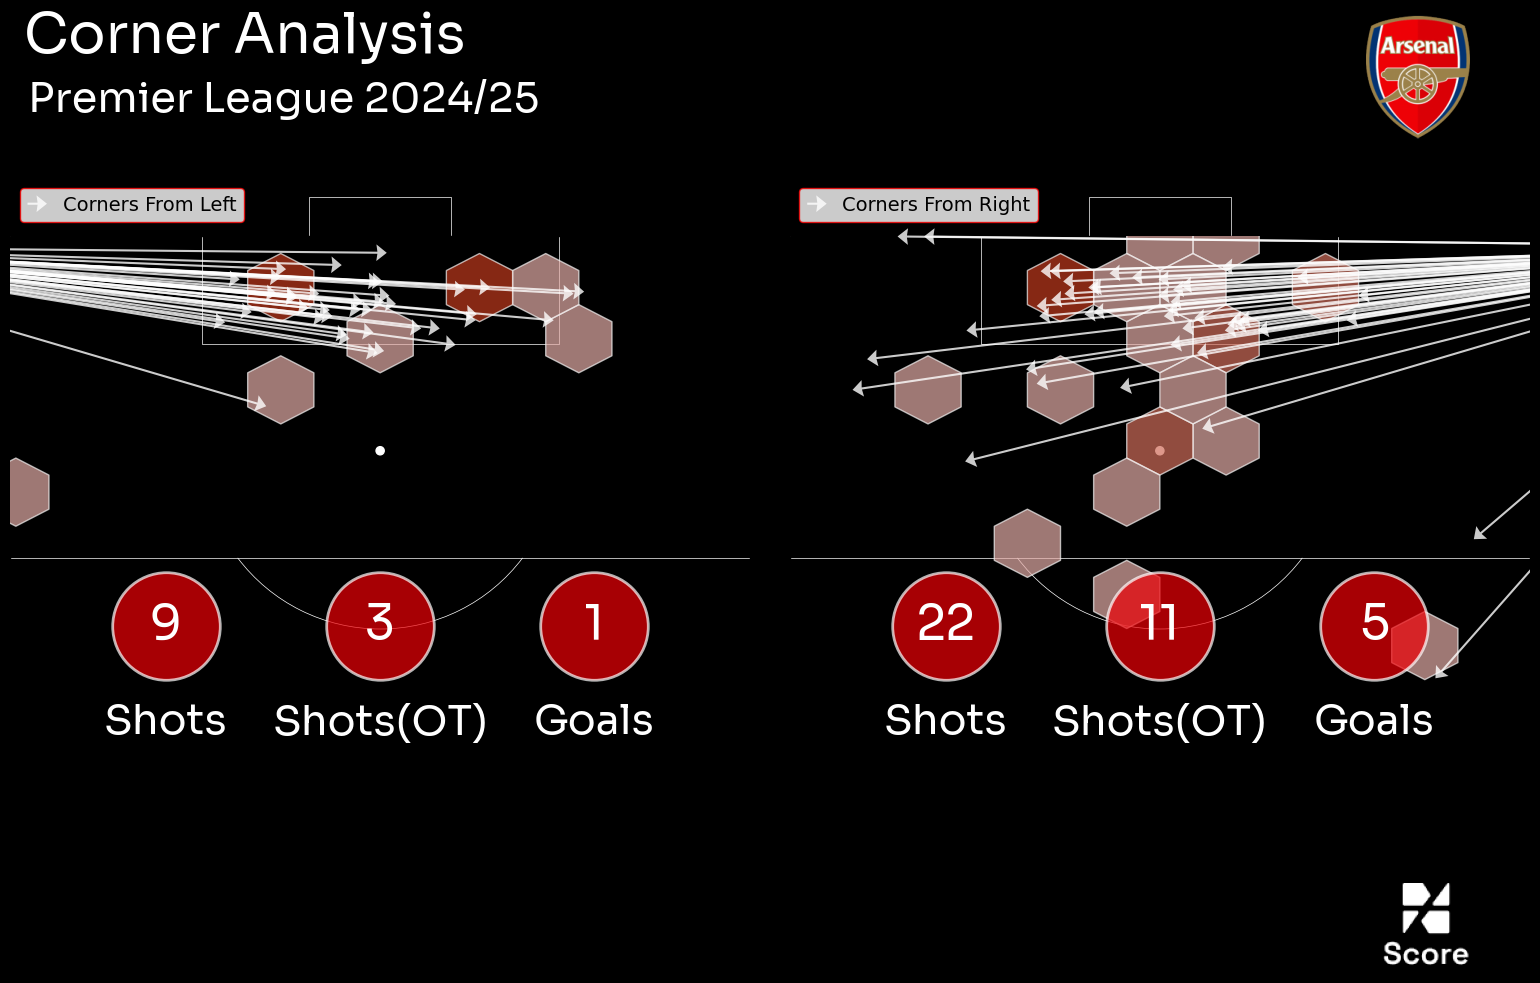

In [677]:
from matplotlib.colors import LinearSegmentedColormap
FIGWIDTH = 16
FIGHEIGHT = 9
NROWS = 1
NCOLS = 2
SPACE = 0.05
MAX_GRID = 0.95

pitch = VerticalPitch(pad_top=3, pad_bottom=-15,goal_type='box',
                      pad_left=-15, pad_right=-15, linewidth=0.5, half=True,pitch_type='uefa',
                      pitch_color=background, stripe=False, line_color='white')

GRID_WIDTH, GRID_HEIGHT = pitch.grid_dimensions(figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                                                nrows=NROWS, ncols=NCOLS,
                                                max_grid=MAX_GRID, space=SPACE)
TITLE_HEIGHT = 0.08
ENDNOTE_HEIGHT = 0

fig, ax = pitch.grid(figheight=FIGHEIGHT, grid_width=GRID_WIDTH, grid_height=GRID_HEIGHT,
                     space=SPACE, ncols=NCOLS, nrows=NROWS, title_height=TITLE_HEIGHT,
                     endnote_height=ENDNOTE_HEIGHT, axis=False)
fig.set_facecolor(background)
pitch.arrows(corners_l.x, corners_l.y,
             corners_l.endX, corners_l.endY, width=1.5,alpha=0.8,zorder=3,
             headwidth=8, headlength=5, color='white', ax=ax['pitch'][0], label='Corners From Left')

pitch.arrows(corners_2.x, corners_2.y,
             corners_2.endX, corners_2.endY, width=1.5,alpha=0.8,zorder=3,
             headwidth=8, headlength=5, color='white', ax=ax['pitch'][1], label='Corners From Right')

# Set up the legend
ax['pitch'][0].legend(facecolor='white', handlelength=1, edgecolor='red', fontsize=14, loc='upper left')
# Set up the legend
ax['pitch'][1].legend(facecolor='white', handlelength=1, edgecolor='red', fontsize=14, loc='upper left')



flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
hexmap = pitch.hexbin(corners_1.next_shot_x, corners_1.next_shot_y,zorder=2,alpha=0.7, ax=ax['pitch'][0], edgecolors='#f4f4f4',
                      gridsize=(20, 20), cmap=flamingo_cmap)
hexmap = pitch.hexbin(corners_2.next_shot_x, corners_2.next_shot_y,zorder=2,alpha=0.7, ax=ax['pitch'][1], edgecolors='#f4f4f4',
                      gridsize=(20, 20), cmap=flamingo_cmap)


pitch.scatter(85,45,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Shots',xy = (80,45),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])

pitch.scatter(85,34,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Shots(OT)',xy = (80,34),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])

pitch.scatter(85,23,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['goals'][0],xy = (85,23),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Goals',xy = (80,23),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])


pitch.scatter(85,45,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Shots',xy = (80,45),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])

pitch.scatter(85,34,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Shots(OT)',xy = (80,34),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])


pitch.scatter(85,23,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['goals'][0],xy = (85,23),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Goals',xy = (80,23),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])

img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Arsenal.png')
ax_image = add_image(
img_team, fig, left=0.83, bottom=0.93, width=0.15, height=0.15,aspect='equal')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
logo, fig, left=0.86, bottom=0.01, width=0.1, height=0.1,aspect='equal')


fig.text(0.31,1.05,f"Corner Analysis", fontsize=40,fontproperties=font_prop,ha='right', va='center', color='white')
fig.text(0.356,0.98,f"Premier League 2024/25", fontsize=30,fontproperties=font_prop,ha='right', va='center', color='white')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Arsenal/CornerAnalysis.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [326]:
#### Stats - Shots / Goals / xG from Understat Data , Combined xT , Most Corners From Player , Most Corners To

## High Turnovers

In [406]:
df['teamName'].unique()

array(['Sporting'], dtype=object)

In [407]:
# function to get possession chains, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def get_possession_chains(events_df, chain_check, suc_evts_in_chain):
    # Initialise output
    events_out = pd.DataFrame()
    match_events_df = df.reset_index()

    # Isolate valid event types that contribute to possession
    match_pos_events_df = match_events_df[~match_events_df['type'].isin(['OffsideGiven', 'CornerAwarded','Start', 'Card', 'SubstitutionOff',
                                                                                  'SubstitutionOn', 'FormationChange','FormationSet', 'End'])].copy()

    # Add temporary binary outcome and team identifiers
    match_pos_events_df['outcomeBinary'] = (match_pos_events_df['outcomeType']
                                                .apply(lambda x: 1 if x == 'Successful' else 0))
    match_pos_events_df['teamBinary'] = (match_pos_events_df['teamName']
                         .apply(lambda x: 1 if x == min(match_pos_events_df['teamName']) else 0))
    match_pos_events_df['goalBinary'] = ((match_pos_events_df['type'] == 'Goal')
                         .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))

    # Create a dataframe to investigate possessions chains
    pos_chain_df = pd.DataFrame()

    # Check whether each event is completed by same team as the next (check_evts-1) events
    for n in np.arange(1, chain_check):
        pos_chain_df[f'evt_{n}_same_team'] = abs(match_pos_events_df['teamBinary'].diff(periods=-n))
        pos_chain_df[f'evt_{n}_same_team'] = pos_chain_df[f'evt_{n}_same_team'].apply(lambda x: 1 if x > 1 else x)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df.sum(axis=1).apply(lambda x: 1 if x < chain_check - suc_evts_in_chain else 0)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df['enough_evt_same_team'].diff(periods=1)
    pos_chain_df[pos_chain_df['enough_evt_same_team'] < 0] = 0

    match_pos_events_df['period'] = pd.to_numeric(match_pos_events_df['period'], errors='coerce')
    # Check there are no kick-offs in the upcoming (check_evts-1) events
    pos_chain_df['upcoming_ko'] = 0
    for ko in match_pos_events_df[(match_pos_events_df['goalBinary'] == 1) | (match_pos_events_df['period'].diff(periods=1))].index.values:
        ko_pos = match_pos_events_df.index.to_list().index(ko)
        pos_chain_df.iloc[ko_pos - suc_evts_in_chain:ko_pos, 5] = 1

    # Determine valid possession starts based on event team and upcoming kick-offs
    pos_chain_df['valid_pos_start'] = (pos_chain_df.fillna(0)['enough_evt_same_team'] - pos_chain_df.fillna(0)['upcoming_ko'])

    # Add in possession starts due to kick-offs (period changes and goals).
    pos_chain_df['kick_off_period_change'] = match_pos_events_df['period'].diff(periods=1)
    pos_chain_df['kick_off_goal'] = ((match_pos_events_df['type'] == 'Goal')
                     .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))
    pos_chain_df.loc[pos_chain_df['kick_off_period_change'] == 1, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df['kick_off_goal'] == 1, 'valid_pos_start'] = 1

    # Add first possession manually
    pos_chain_df['teamName'] = match_pos_events_df['teamName']
    pos_chain_df.loc[pos_chain_df.head(1).index, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_id'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_team'] = pos_chain_df.loc[pos_chain_df.head(1).index, 'teamName']

    # Iterate through valid possession starts and assign them possession ids
    valid_pos_start_id = pos_chain_df[pos_chain_df['valid_pos_start'] > 0].index

    possession_id = 2
    for idx in np.arange(1, len(valid_pos_start_id)):
        current_team = pos_chain_df.loc[valid_pos_start_id[idx], 'teamName']
        previous_team = pos_chain_df.loc[valid_pos_start_id[idx - 1], 'teamName']
        if ((previous_team == current_team) & (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_goal'] != 1) &
                (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_period_change'] != 1)):
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = np.nan
        else:
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = possession_id
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_team'] = pos_chain_df.loc[valid_pos_start_id[idx], 'teamName']
            possession_id += 1

    # Assign possession id and team back to events dataframe
    match_events_df = pd.merge(match_events_df, pos_chain_df[['possession_id', 'possession_team']], how='left', left_index=True, right_index=True)

    # Fill in possession ids and possession team
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='ffill'))
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='bfill'))

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_df])

    return events_out

In [408]:
df = get_possession_chains(df, 5, 3)

KeyboardInterrupt: 

In [380]:
def HighTO(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=background, line_color='white', linewidth=0.5)
    pitch.draw(ax=ax)

    # High Turnover means any sequence which starts in open play and within 40 metres of the opponent's goal 
    highTO = df
    highTO['Distance'] = ((highTO['x'] - 105)**2 + (highTO['y'] - 34)**2)**0.5

    # HTO which led to Goal for away team
    agoal_count = 0
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and  
            (highTO.loc[i, 'Distance'] <= 40)):
            
            possession_id = highTO.loc[i, 'possession_id']
            
            # Check the following rows within the same possession
            j = i + 1
            while j < len(highTO) and highTO.loc[j, 'possession_id'] == possession_id:
                if highTO.loc[j, 'type'] == 'Goal':
                    ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=600, marker='*', color='green', edgecolor='k', zorder=3)
                    agoal_count += 1
                    break
                j += 1

    # HTO which led to Shot for away team
    ashot_count = 0
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and 
            (highTO.loc[i, 'Distance'] <= 40)):
            
            possession_id = highTO.loc[i, 'possession_id']
            
            # Check the following rows within the same possession
            j = i + 1
            while j < len(highTO) and highTO.loc[j, 'possession_id'] == possession_id:
                if ('Shot' in highTO.loc[j, 'type']):
                    ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=150, color='green', edgecolor=background, zorder=2)
                    ashot_count += 1
                    break
                j += 1
    
    # other HTO for away team
    aht_count = 0
    p_list = []
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and  (highTO.loc[i, 'Distance'] <= 40)):
            # Check the following rows
            j = i + 1
            if ((highTO.loc[j, 'type']!='Dispossessed') and (highTO.loc[j, 'type']!='OffsidePass')):
                ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=100, color='None', edgecolor='green')
                aht_count += 1
                p_list.append(highTO.loc[i, 'shortName'])

    # Plotting the half circle
    left_circle = plt.Circle((0,34), 40, color='green', fill=True, alpha=0.25, linestyle='dashed')
    ax.add_artist(left_circle)
    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')
    # Headlines and other texts
    #ax.text(0, 70, f"{hteamName}\nHigh Turnover: {hht_count}", color='green', size=25, ha='left', fontweight='bold')
    #ax.text(105, 70, f"{ateamName}\nHigh Turnover: {aht_count}", color='green', size=25, ha='right', fontweight='bold')
    #ax.text(0,  -3, '<---Attacking Direction', color='green', fontsize=13, ha='left', va='center')
    #ax.text(105,-3, 'Attacking Direction--->', color='green', fontsize=13, ha='right', va='center')
    
    away_data = {
        'Total_High_Turnovers': aht_count,
        'Shot_Ending_High_Turnovers': ashot_count,
        'Goal_Ending_High_Turnovers': agoal_count
    }
    
    return away_data

KeyError: 'possession_id'

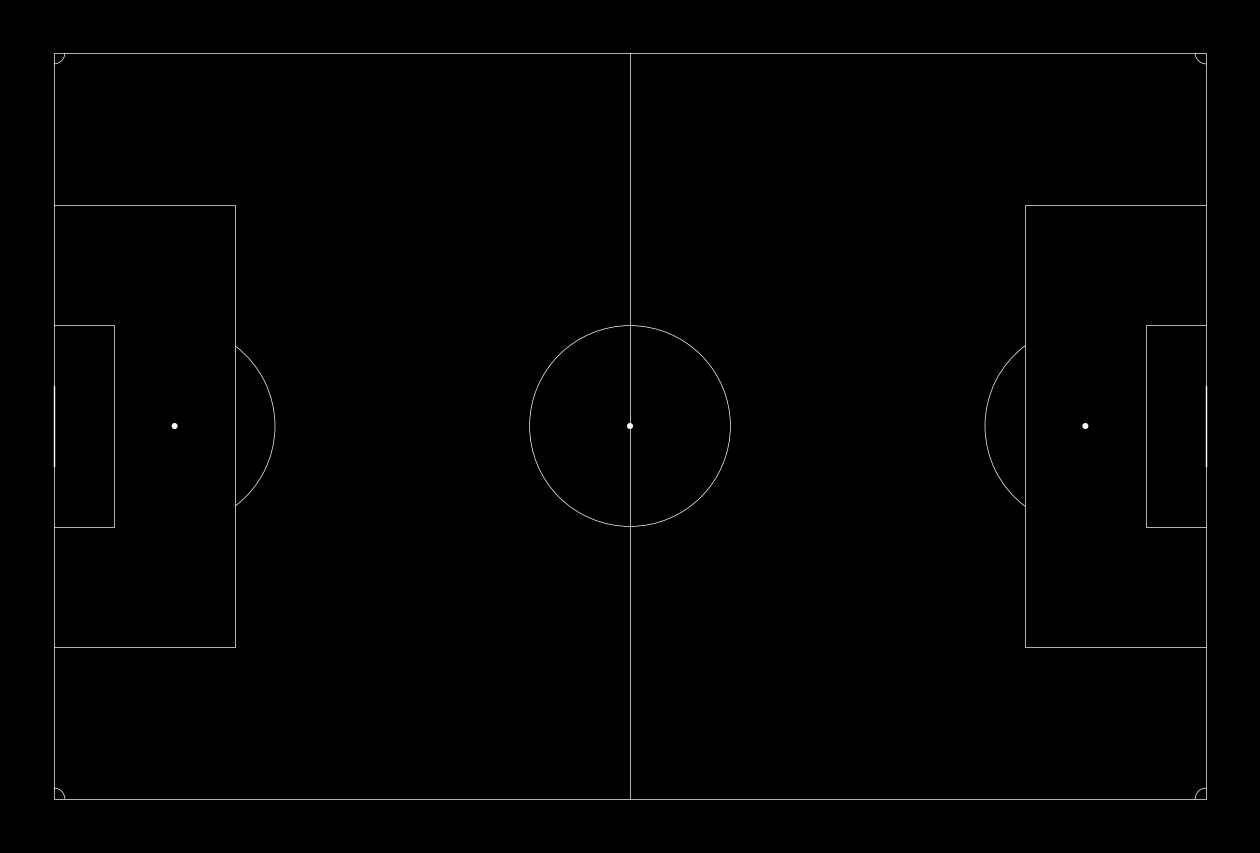

In [381]:
fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
high_turnover_stats = HighTO(ax)
high_turnover_stats_df = pd.DataFrame(high_turnover_stats)

## xG Generated Vs Average Possession %

In [122]:
query = """SELECT 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END AS team,
    SUM(ROUND("xG"::NUMERIC,2)) AS xG,
    SUM(ROUND(CASE WHEN situation = 'OpenPlay' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_openplay,
    SUM(ROUND(CASE WHEN situation = 'SetPiece' or situation = 'FromCorner' or situation = 'DirectFreekick' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_setpiece
FROM understat_shots_tb ust
WHERE 
    season = '2024' 
    AND league = 'Bundesliga'
GROUP BY 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END;"""

with engine.connect() as conn:
    df_xg = pd.read_sql(query, conn)

In [126]:
list(df_xg['team'])

['FC Heidenheim',
 'Mainz 05',
 'Bayer Leverkusen',
 'Union Berlin',
 'Freiburg',
 'Werder Bremen',
 'Holstein Kiel',
 'St. Pauli',
 'Borussia Dortmund',
 'Bayern Munich',
 'Wolfsburg',
 'VfB Stuttgart',
 'Eintracht Frankfurt',
 'Borussia M.Gladbach',
 'RasenBallsport Leipzig',
 'Hoffenheim',
 'Bochum',
 'Augsburg']

In [127]:
# Existing DataFrame with xG data
teams = ['FC Heidenheim',
 'Mainz 05',
 'Bayer Leverkusen',
 'Union Berlin',
 'Freiburg',
 'Werder Bremen',
 'Holstein Kiel',
 'St. Pauli',
 'Borussia Dortmund',
 'Bayern Munich',
 'Wolfsburg',
 'VfB Stuttgart',
 'Eintracht Frankfurt',
 'Borussia M.Gladbach',
 'RasenBallsport Leipzig',
 'Hoffenheim',
 'Bochum',
 'Augsburg']

# Corresponding possession percentages
possession_pct = [42.2, 49.8, 59.3, 39.8, 48.9,
                  49.1, 43.6, 44.1, 59.6, 68.9,
                  45.8, 57.0, 49.3, 49.8,
                  53.0, 48.8, 43.6,42.6]

# Create the DataFrame
df_pos = pd.DataFrame({'team': teams, 'Possession (%)': possession_pct})

In [128]:
df_xg['team'].unique()

array(['FC Heidenheim', 'Mainz 05', 'Bayer Leverkusen', 'Union Berlin',
       'Freiburg', 'Werder Bremen', 'Holstein Kiel', 'St. Pauli',
       'Borussia Dortmund', 'Bayern Munich', 'Wolfsburg', 'VfB Stuttgart',
       'Eintracht Frankfurt', 'Borussia M.Gladbach',
       'RasenBallsport Leipzig', 'Hoffenheim', 'Bochum', 'Augsburg'],
      dtype=object)

In [129]:
df_xg_pos = df_xg.merge(df_pos,on='team',how='left')

In [131]:
df_xg_pos.loc[14, "team"] = "RB Leipzig"

In [132]:
df_xg_pos

,team,xg,xg_openplay,xg_setpiece,Possession (%)
0,FC Heidenheim,39.45,24.68,10.97,42.2
1,Mainz 05,49.68,37.29,10.11,49.8
2,Bayer Leverkusen,60.85,40.69,16.36,59.3
3,Union Berlin,40.41,25.30,12.83,39.8
4,Freiburg,52.13,39.25,9.84,48.9
5,Werder Bremen,49.85,37.93,8.88,49.1
6,Holstein Kiel,38.88,28.75,7.85,43.6
7,St. Pauli,38.71,26.46,10.73,44.1
8,Borussia Dortmund,63.19,50.29,9.10,59.6
9,Bayern Munich,88.65,66.58,14.47,68.9


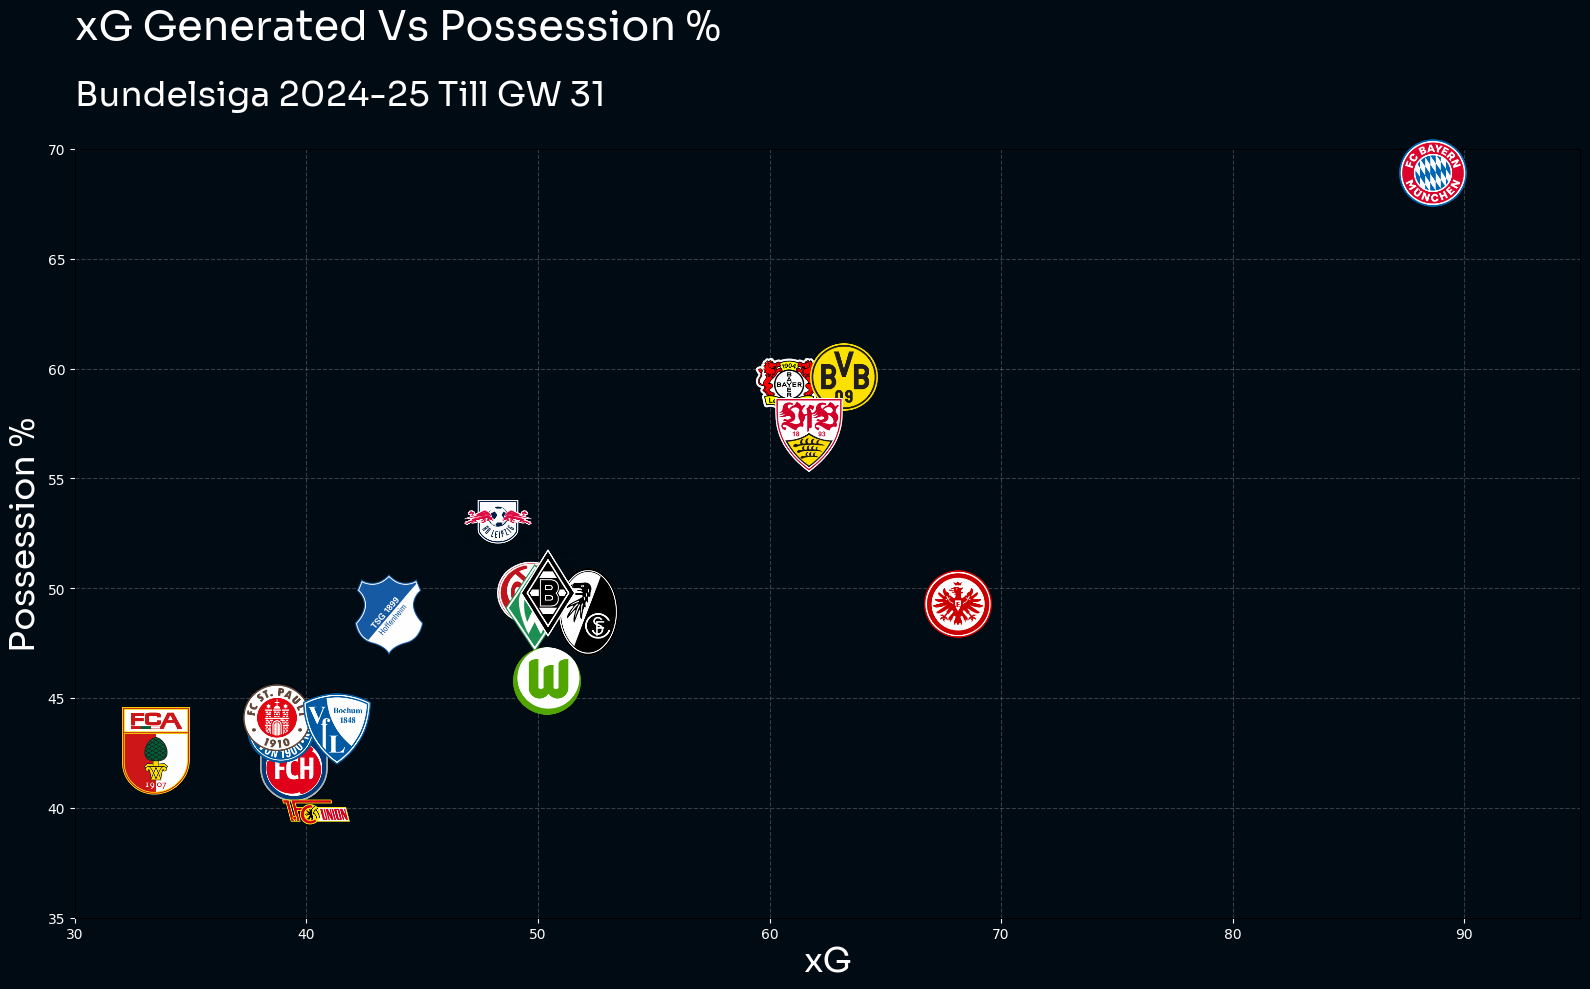

In [137]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//Germany - Bundesliga//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df_xg_pos.iterrows():
    team, xg, pos = row['team'], row['xg'], row['Possession (%)']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.35)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (xg, pos), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(xg, pos, color='red', label=team)

# Customize the plot
ax.set_xlim(30, 95)
ax.set_ylim(35, 70)
ax.set_xlabel('xG',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('Possession %',font=font_prop,color='white', fontsize=25)
#ax.set_title('Premier League\n 2024-25 Till GW 27',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

title_text = f"xG Generated Vs Possession %"
subtitle_text = "Bundelsiga 2024-25 Till GW 31"

# Title
ax.text(30, 75, title_text, fontweight="bold",fontproperties=font_prop, fontsize=30, color='w')
ax.text(30, 72, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=25, color='w')


ax.tick_params(axis='x', colors='white', labelsize=10)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=10)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/xGVPos.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## xG Conceded Vs Shots from Counter Attacks

In [56]:
shots_from_counter = df[df['shotCounter'] == True].groupby('teamName').size().reset_index(name='count')

In [61]:
shots_from_counter['team'] = shots_from_counter['teamName']

In [72]:
shots_from_counter.loc[12, "team"] = "Manchester City"
shots_from_counter.loc[13, "team"] = "Manchester United"
shots_from_counter.loc[14, "team"] = "Newcastle United"

In [73]:
query = """SELECT 
    CASE 
        WHEN h_a = 'a' THEN h_team 
        ELSE a_team 
    END AS team,
    SUM(ROUND("xG"::NUMERIC,2)) AS xG_against,
    SUM(ROUND(CASE WHEN situation = 'OpenPlay' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_openplay_against,
    SUM(ROUND(CASE WHEN situation = 'SetPiece' or situation = 'FromCorner' or situation = 'DirectFreekick' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_setpiece_against
FROM understat_shots_tb ust
WHERE 
    season = '2024' 
    AND league = 'EPL'
GROUP BY 
    CASE 
        WHEN h_a = 'a' THEN h_team 
        ELSE a_team 
    END;"""

with engine.connect() as conn:
    df_xg_against = pd.read_sql(query, conn)

In [74]:
df_xg_against.loc[19, "team"] = "Wolves"

In [75]:
df_xg_against_shots_counter = df_xg_against.merge(shots_from_counter,on='team',how='left')

In [79]:
df_xg_against_shots_counter

,team,xg_against,xg_openplay_against,xg_setpiece_against,teamName,count
0,Arsenal,30.89,21.93,6.68,Arsenal,24
1,Aston Villa,49.72,40.59,7.61,Aston Villa,28
2,Bournemouth,46.44,32.17,11.23,Bournemouth,40
3,Brentford,54.14,44.48,8.90,Brentford,22
4,Brighton,51.56,36.57,9.67,Brighton,16
5,Chelsea,48.60,33.93,10.11,Chelsea,47
6,Crystal Palace,54.21,41.32,11.37,Crystal Palace,34
7,Everton,49.81,37.38,10.91,Everton,33
8,Fulham,41.36,29.77,10.07,Fulham,31
9,Ipswich,77.37,60.00,13.57,Ipswich,30


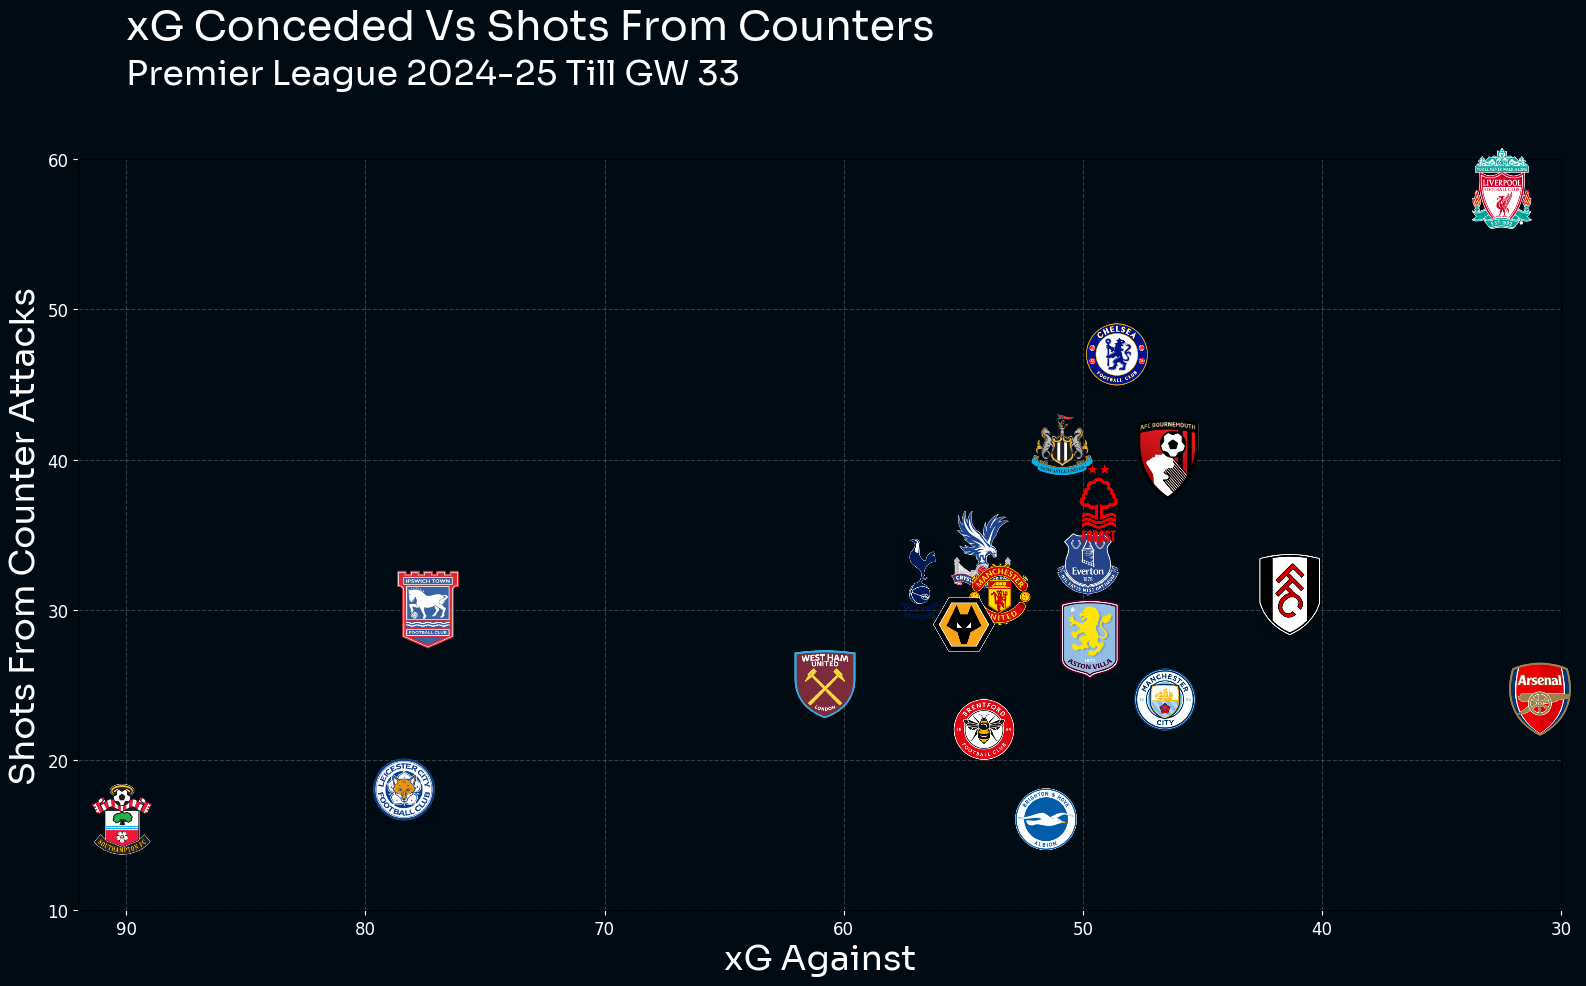

In [90]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//England - Premier League//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df_xg_against_shots_counter.iterrows():
    team, xg_ag, shots_counter = row['team'], row['xg_against'], row['count']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.32)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (xg_ag, shots_counter), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(xg_ag, shots_counter, color='red', label=team)

#ax.gca().invert_xaxis()
# Customize the plot
ax.set_xlim(30, 92)
ax.set_ylim(10, 60)
ax.set_xlabel('xG Against',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('Shots From Counter Attacks',font=font_prop,color='white', fontsize=25)
#ax.set_title('Premier League\n 2024-25 Till GW 27',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

title_text = f"xG Conceded Vs Shots From Counters"
subtitle_text = "Premier League 2024-25 Till GW 33"

# Title
ax.text(90, 68, title_text, fontweight="bold",fontproperties=font_prop, fontsize=30, color='w')
ax.text(90, 65, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=25, color='w')

ax.invert_xaxis()

ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/2.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Big Chances Created Vs Scored

In [178]:
scored = df[df['bigChanceScored'] == True].groupby('playerName').size().reset_index(name='scored')
scored = scored.sort_values(by='scored', ascending=False)

In [179]:
created = df[df['bigChanceCreated'] == True].groupby('playerName').size().reset_index(name='created')
created = created.sort_values(by='created', ascending=False)

In [182]:
player_minutes = df.groupby(['playerName', 'teamName', 'matchId'])['maxMinute'].max().reset_index()

# Step 2: Sum total minutes played across all matches
total_minutes_played = player_minutes.groupby(['playerName', 'teamName'])['maxMinute'].sum().reset_index()
total_minutes_played.rename(columns={'maxMinute': 'TotalMinutesPlayed'}, inplace=True)

In [183]:
total_minutes_played.columns

Index(['playerName', 'teamName', 'TotalMinutesPlayed'], dtype='object')

In [180]:
result = scored.merge(created,on='playerName',how='left')

In [184]:
result = result.merge(total_minutes_played, on='playerName',how='left')

In [185]:
result.columns

Index(['playerName', 'scored', 'created', 'teamName', 'TotalMinutesPlayed'], dtype='object')

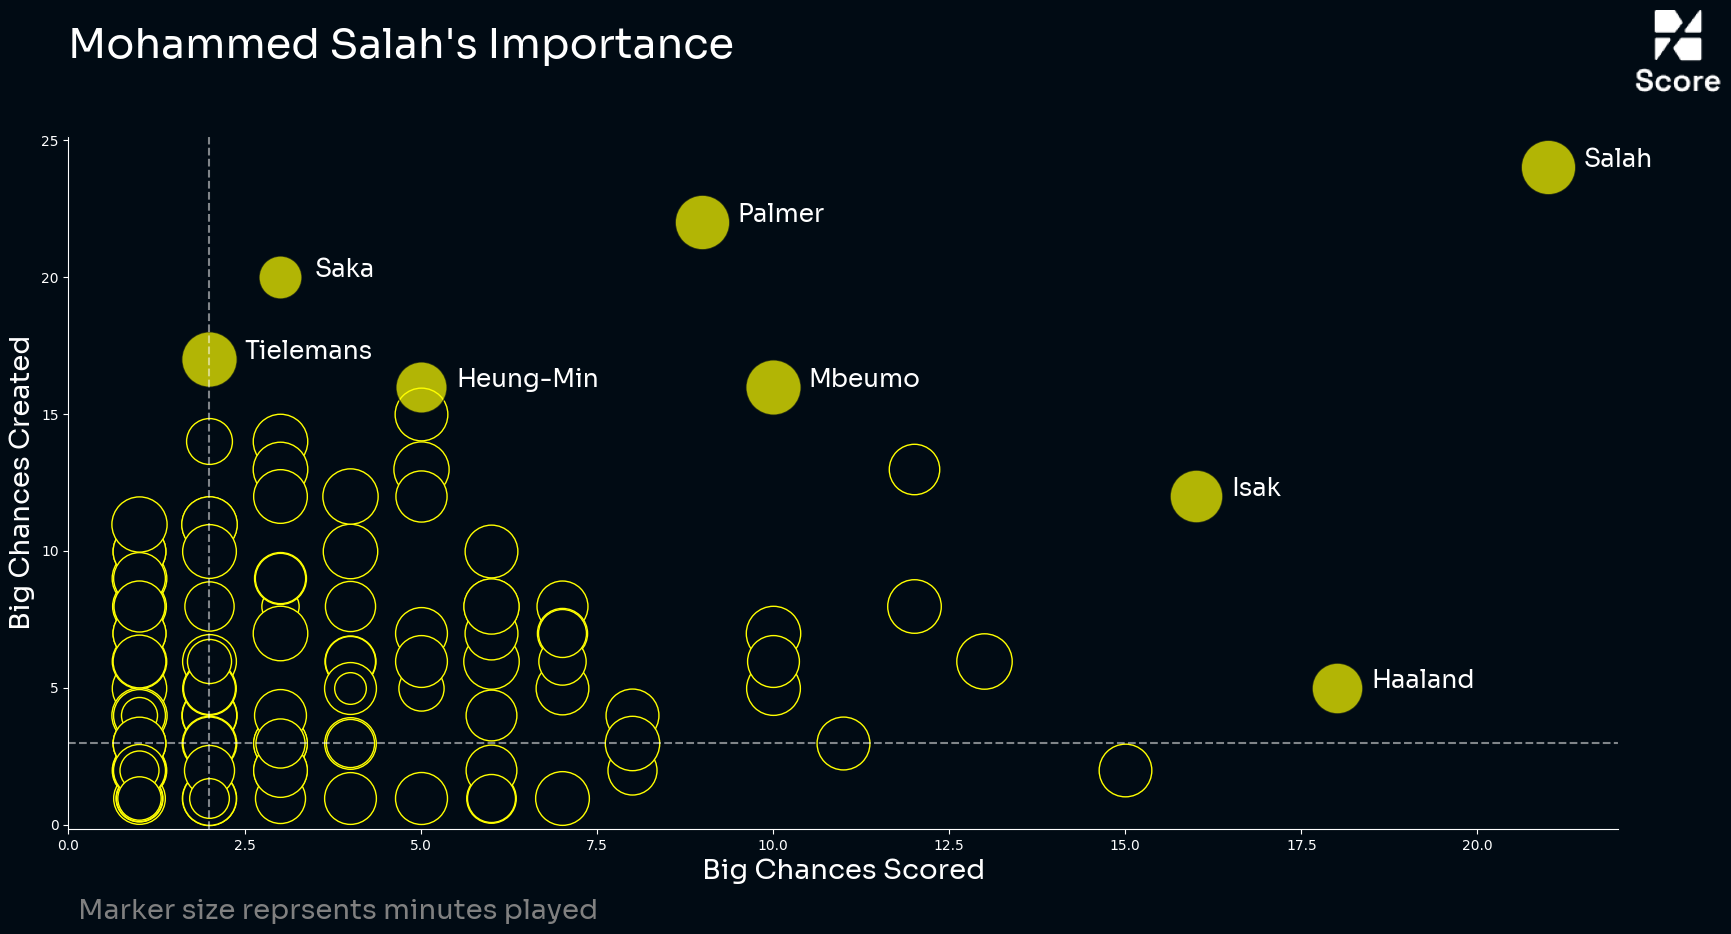

In [197]:
fig, ax = plt.subplots(figsize=(20,9))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

for index,row in result.iterrows():

  if ( ((row['scored'] >= 16)) or (row['created'] >= 16)):
    ax.scatter(row['scored'], row['created'],color='yellow',s=row['TotalMinutesPlayed'] * 0.5,edgecolor=background,zorder=1,alpha=0.7)
    ax.annotate(row['playerName'].split(' ')[1],xy = (row['scored']+0.5,row['created']),fontproperties=font_prop,color='white',fontsize=18,zorder=5)
  else:
    ax.scatter(row['scored'], row['created'],color=background,s=row['TotalMinutesPlayed'] * 0.5,edgecolor='yellow')


median_saves = result['scored'].median()
median_passes = result['created'].median()
ax.axvline(median_saves, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)
ax.axhline(median_passes, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.92, width=0.1, height=0.1,aspect='equal'
)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_color(background)
ax.spines['right'].set_color(background)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xlabel("Big Chances Scored",fontproperties=font_prop,color='white',fontsize=20)
ax.set_ylabel("Big Chances Created",fontproperties=font_prop,color='white',fontsize=20)
ax.grid(False)
#ax.set_title("Top GoalKeepers - LaLiga 2024/25",fontproperties=font_prop,color='white',fontsize=32,y=1.07)
#ax.suptitle("Players With 100+ Passes and Carries",fontsize=18,color='white')
ax.text(0, 28, "Mohammed Salah's Importance", fontproperties=font_prop,ha='left', fontsize=30,color='white')
#ax.text(0.8, 96, "Minimum 1000 minutes played | 2024/25", fontproperties=font_prop,ha='left', fontsize=20,color='white')

fig.text(0.13,0.01, "Marker size reprsents minutes played", fontproperties=font_prop,ha='left', fontsize=20,color='grey')


#ax.scatter(2, 99,edgecolor='yellow',s=500,color=background)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Liverpool/Salah.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## High Pressing Team

In [188]:
interception_ft = df[(df['type'] == 'Interception') & (df['x']>70.13) & (df['outcomeType']=='Successful')].groupby('teamName').size().reset_index(name='interc_ft')
interception_ft = interception_ft.sort_values(by='interc_ft', ascending=False)

ballrec_ft = df[(df['type'] == 'BallRecovery') & (df['x']>70.13) & (df['outcomeType']=='Successful')].groupby('teamName').size().reset_index(name='ballrec_ft')
ballrec_ft = ballrec_ft.sort_values(by='ballrec_ft', ascending=False)

result_df = interception_ft.merge(ballrec_ft,on='teamName',how='left')

In [189]:
result_df

,teamName,interc_ft,ballrec_ft
0,Bayern Munich,22,95
1,PSV,19,69
2,Arsenal,17,69
3,Borussia Dortmund,14,69
4,PSG,14,80
5,Barcelona,14,68
6,VfB Stuttgart,12,51
7,Monaco,10,40
8,Brest,10,55
9,AC Milan,10,43


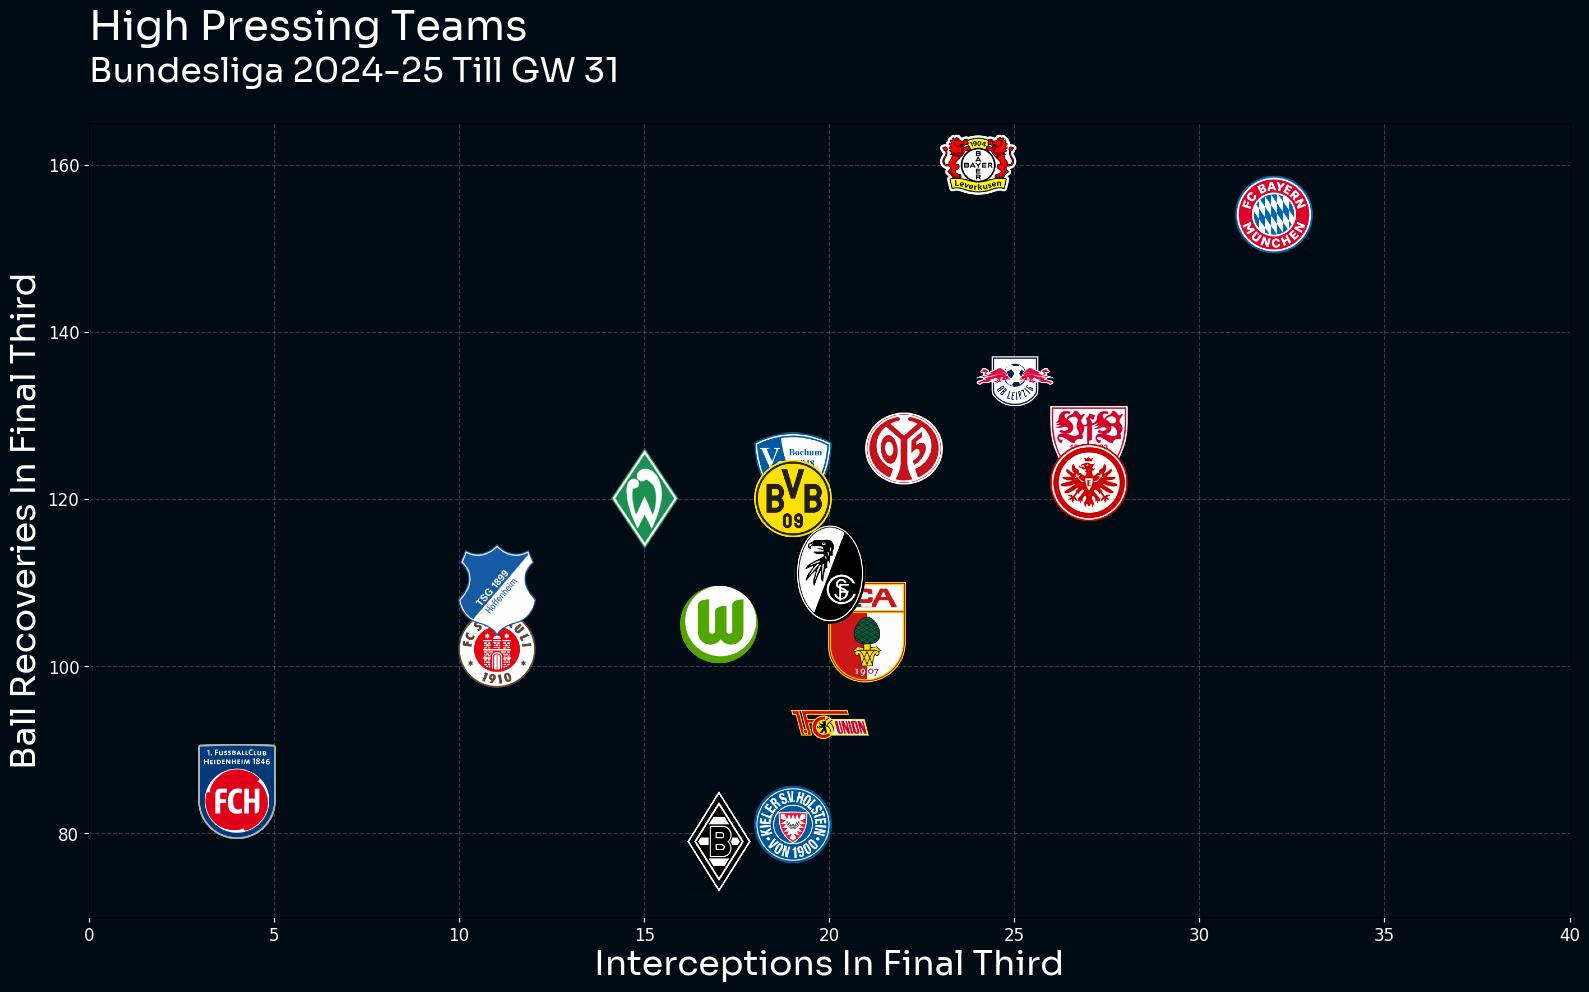

In [51]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//Germany - Bundesliga//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in result_df.iterrows():
    team, interc_ft, ballrec_ft = row['teamName'], row['interc_ft'], row['ballrec_ft']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.4)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (interc_ft, ballrec_ft), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(interc_ft, ballrec_ft, color='red', label=team)

#ax.gca().invert_xaxis()
# Customize the plot
ax.set_xlim(0, 40)
ax.set_ylim(70, 165)
ax.set_xlabel('Interceptions In Final Third',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('Ball Recoveries In Final Third',font=font_prop,color='white', fontsize=25)
#ax.set_title('Premier League\n 2024-25 Till GW 27',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

title_text = f"High Pressing Teams"
subtitle_text = "Bundesliga 2024-25 Till GW 31"

# Title
ax.text(0, 175, title_text, fontweight="bold",fontproperties=font_prop, fontsize=30, color='w')
ax.text(0, 170, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=25, color='w')

ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/HighPressers.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Key Passes Vs Dribbles

In [143]:
dribbles = df[(df['type'] == 'TakeOn') & (df['outcomeType']=='Successful')].groupby('playerName').size().reset_index(name='dribbles')
dribbles = dribbles.sort_values(by='dribbles', ascending=False)

keypass = df[(df['passKey'] == True) & (df['outcomeType']=='Successful')].groupby('playerName').size().reset_index(name='keypass')
keypass = keypass.sort_values(by='keypass', ascending=False)

result_df = dribbles.merge(keypass,on='playerName',how='left')

In [145]:
player_minutes = df.groupby(['playerName', 'teamName', 'matchId'])['maxMinute'].max().reset_index()

# Step 2: Sum total minutes played across all matches
total_minutes_played = player_minutes.groupby(['playerName', 'teamName'])['maxMinute'].sum().reset_index()
total_minutes_played.rename(columns={'maxMinute': 'TotalMinutesPlayed'}, inplace=True)

result = result_df.merge(total_minutes_played, on='playerName',how='left')

In [146]:
result.head()

,playerName,dribbles,keypass,teamName,TotalMinutesPlayed
0,Jamie Gittens,77,21.0,Borussia Dortmund,2765
1,Florian Wirtz,75,52.0,Bayer Leverkusen,2655
2,Jamal Musiala,72,41.0,Bayern Munich,2354
3,Michael Olise,60,76.0,Bayern Munich,2919
4,Ritsu Doan,51,24.0,Freiburg,2904


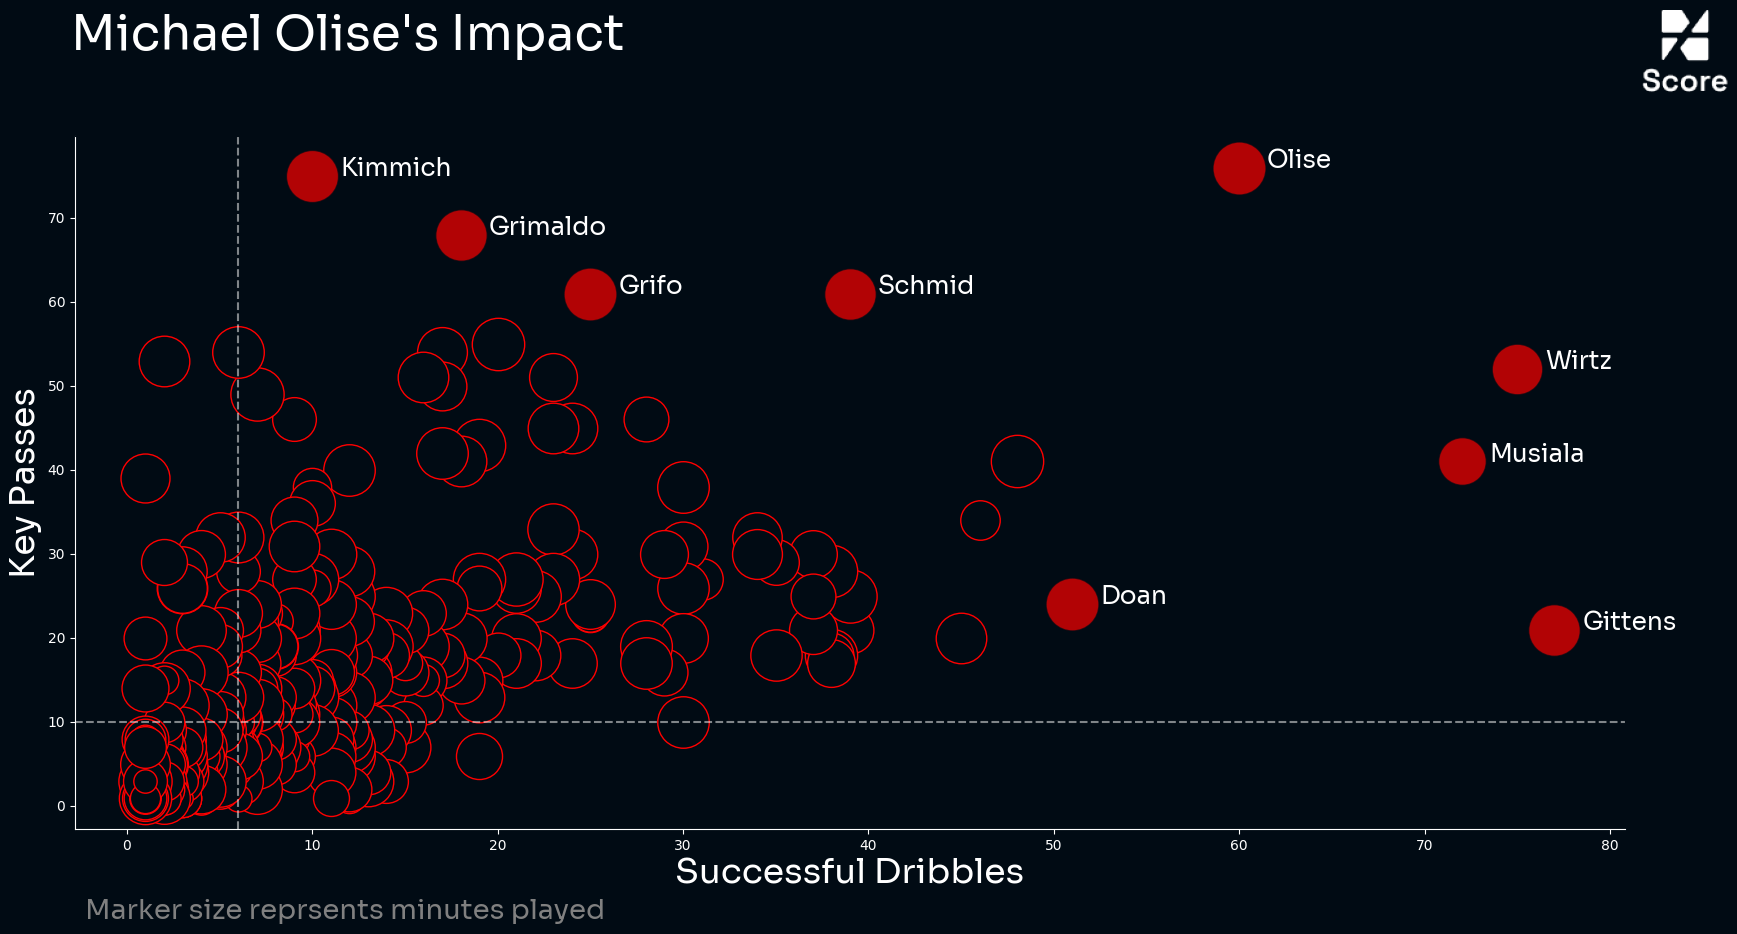

In [154]:
fig, ax = plt.subplots(figsize=(20,9))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

for index,row in result.iterrows():

  if ( ((row['dribbles'] >= 50)) or (row['keypass'] >= 60)):
    ax.scatter(row['dribbles'], row['keypass'],color='red',s=row['TotalMinutesPlayed'] * 0.5,edgecolor=background,zorder=1,alpha=0.7)
    ax.annotate(row['playerName'].split(' ')[1],xy = (row['dribbles']+1.5,row['keypass']),fontproperties=font_prop,color='white',fontsize=18,zorder=5)
  else:
    ax.scatter(row['dribbles'], row['keypass'],color=background,s=row['TotalMinutesPlayed'] * 0.5,edgecolor='red')


median_saves = result['dribbles'].median()
median_passes = result['keypass'].median()
ax.axvline(median_saves, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)
ax.axhline(median_passes, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.92, width=0.1, height=0.1,aspect='equal'
)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_color(background)
ax.spines['right'].set_color(background)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xlabel("Successful Dribbles",fontproperties=font_prop,color='white',fontsize=25)
ax.set_ylabel("Key Passes",fontproperties=font_prop,color='white',fontsize=25)
ax.grid(False)
#ax.set_title("Top GoalKeepers - LaLiga 2024/25",fontproperties=font_prop,color='white',fontsize=32,y=1.07)
#ax.suptitle("Players With 100+ Passes and Carries",fontsize=18,color='white')
ax.text(-3, 90, "Michael Olise's Impact", fontproperties=font_prop,ha='left', fontsize=35,color='white')
#ax.text(0.8, 96, "Minimum 1000 minutes played | 2024/25", fontproperties=font_prop,ha='left', fontsize=20,color='white')

fig.text(0.13,0.01, "Marker size reprsents minutes played", fontproperties=font_prop,ha='left', fontsize=20,color='grey')


#ax.scatter(2, 99,edgecolor='yellow',s=500,color=background)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/Olise.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Top 5 Threat Creators

In [61]:
xt_distribution = df[df['type'].isin(['Pass', 'Carry'])] \
        .groupby(['shortName', 'type'])['xT'].sum() \
        .unstack(fill_value=0)
    
xt_top5 = xt_distribution.sum(axis=1).nlargest(5).index

xt_top5_df = xt_distribution.loc[xt_top5].sort_values(by=['Pass', 'Carry'], ascending=(False,False))
#xt_top5_df = xt_distribution.loc[xt_top5].sort_values(by=xt_distribution.loc[xt_top5].sum(axis=1), ascending=False)


xt_top5_df['Carry'] = round(xt_top5_df['Carry'],2)
xt_top5_df['Pass'] = round(xt_top5_df['Pass'],2)

# Create Total column
xt_top5_df["Total"] = xt_top5_df["Pass"] + xt_top5_df["Carry"]

# Sort by Total in descending order
xt_top5_df = xt_top5_df.sort_values(by="Total", ascending=False)

In [62]:
xt_top5_df

type,Carry,Pass,Total
shortName,,,
M. Olise,-2.49,6.59,4.10
J. Musiala,0.81,1.25,2.06
D. Upamecano,-1.46,2.72,1.26
H. Kane,-0.38,1.24,0.86
J. Kimmich,-6.36,7.18,0.82


In [63]:
def top_5_xT(ax,df,cmap):

    xt_distribution = df[df['type'].isin(['Pass', 'Carry'])] \
        .groupby(['shortName', 'type'])['xT'].sum() \
        .unstack(fill_value=0)
    
    xt_top5 = xt_distribution.sum(axis=1).nlargest(5).index

    xt_top5_df = xt_distribution.loc[xt_top5].sort_values(by=['Pass', 'Carry'], ascending=(False,False))
    #xt_top5_df = xt_distribution.loc[xt_top5].sort_values(by=xt_distribution.loc[xt_top5].sum(axis=1), ascending=False)

    
    xt_top5_df['Carry'] = round(xt_top5_df['Carry'],2)
    xt_top5_df['Carry'] = xt_top5_df['Carry'].apply(lambda x: 0 if x < 0 else x)
    xt_top5_df['Pass'] = round(xt_top5_df['Pass'],2)

    # Create Total column
    xt_top5_df["Total"] = xt_top5_df["Pass"] + xt_top5_df["Carry"]
    
    # Sort by Total in descending order
    xt_top5_df = xt_top5_df.sort_values(by="Total", ascending=False)

    xt_top5_df = xt_top5_df.drop(columns=["Total"])

    # Set player names as index for plotting
    #xt_top5_df.set_index("playerName", inplace=True)
    
    
    
    # Plot horizontal stacked bar chart
    xt_top5_df.plot(kind="barh", stacked=True, colormap=cmap, ax=ax)
    
    # Add counts inside the bars
    for i, player in enumerate(xt_top5_df.index):
        total_width = 0  # Keep track of stacked width
        for action in xt_top5_df.columns:
            if action == 'Carry':
                text_color = 'black'
            else:
                text_color='white'
            value = xt_top5_df.loc[player, action]
            if value > 0.05:  # Only annotate nonzero values
                ax.text(total_width + value / 2, i, value, 
                        ha='center', va='center', fontsize=15, color=text_color,fontproperties=font_prop)
            total_width += value

    return ax

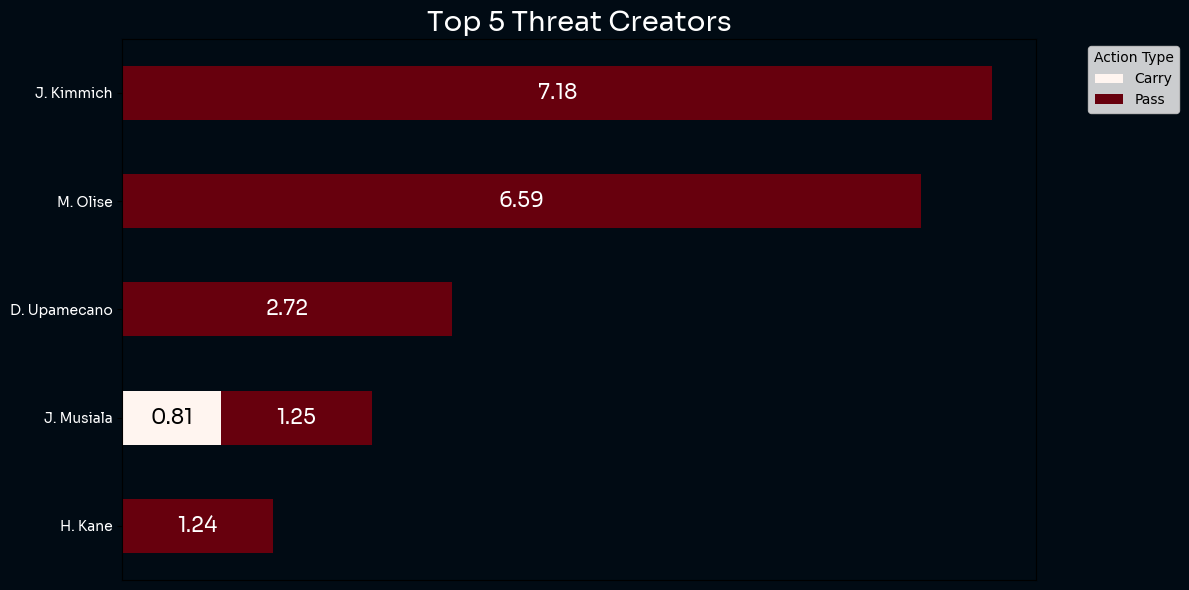

In [65]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

fig.set_facecolor(background)
ax.set_facecolor(background)

top_5_xT(ax,df,"Reds")

plt.title("Top 5 Threat Creators",color='white',fontproperties=font_prop,fontsize=20)
    
plt.ylabel("")  # Hide y-axis label
plt.xticks([])  # Hide x-axis ticks
plt.yticks(fontsize=15, color="white", fontproperties=font_prop)

# Add legend
plt.legend(title="Action Type", bbox_to_anchor=(1.05, 1),loc="upper left")

# Adjust layout and invert y-axis order
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/ThreatCreators.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [66]:
def top_5_carries(ax, df, cmap):
    carry_df = df[df['type'] == 'Carry']

    # Drop rows where playerName or outcomeType is NaN
    carry_df = carry_df.dropna(subset=['shortName', 'outcomeType'])
    
    # Filter for successful carries
    successful_carry_df = carry_df[carry_df['outcomeType'] == 'Successful']
    
    # Count successful carries per player
    successful_carry_counts = successful_carry_df.groupby('shortName')['index'].count().reset_index()
    
    # Rename columns for clarity
    successful_carry_counts.columns = ['shortName', 'successfulCarries']
    
    # Get the top 5 players with the most successful carries
    top_5_carry = successful_carry_counts.nlargest(5, 'successfulCarries').reset_index(drop=True)

    #top_5_carry.plot(kind="barh", stacked=False, colormap=cmap, ax=ax)
    # Plot horizontal bar chart
    bars = ax.barh(top_5_carry['shortName'], top_5_carry['successfulCarries'],  color=cmap,height=0.5)

    # Add counts inside the bars
    for bar, value in zip(bars, top_5_carry['successfulCarries']):
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                str(value), ha='center', va='center', fontsize=18, color='white', fontproperties=font_prop)

    return ax


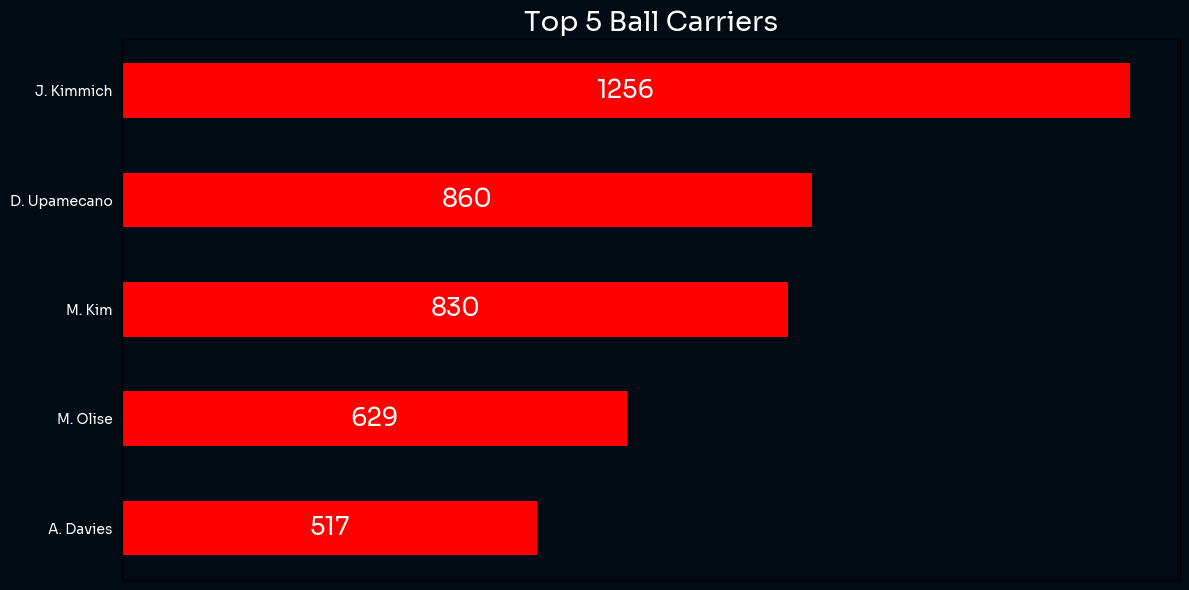

In [68]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

fig.set_facecolor(background)
ax.set_facecolor(background)

top_5_carries(ax,df,"Red")

plt.title("Top 5 Ball Carriers",color='white',fontproperties=font_prop,fontsize=20)
    
plt.ylabel("")  # Hide y-axis label
plt.xticks([])  # Hide x-axis ticks
plt.yticks(fontsize=20, color="white", fontproperties=font_prop)

# Adjust layout and invert y-axis order
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Bayern/BallCarriers.png',dpi=500,bbox_inches = 'tight',facecolor=background)
